<a href="https://colab.research.google.com/github/Haikal7090/TUBES-LIDEA-7/blob/main/Tubes_lidea_ril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependecies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from scipy import stats

# Load Data

In [5]:
!pip install gdown
!gdown --fuzzy "https://docs.google.com/spreadsheets/d/1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN/edit?usp=sharing&ouid=116842443111305752575&rtpof=true&sd=true"

Downloading...
From: https://drive.google.com/uc?id=1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN
To: /content/1744774003471_Data_Tugas_Besar_FINAL.xlsx
100% 1.40M/1.40M [00:00<00:00, 15.0MB/s]


In [6]:
df_raw = pd.read_excel("1744774003471_Data_Tugas_Besar_FINAL.xlsx")
df_raw.head()

,NAME,DESCRIPTION,VALUE,UNITS,DATE_TIME,TAG,DATE_NO,Amount Comp_01
0,AA1,AA1_91_9500062414,0.0,Sm3/d,20210401,91_9500062414,44287,0.0
1,AA1,AA1_91_9500062414,0.0,Sm3/d,20210402,91_9500062414,44288,0.0
2,AA1,AA1_91_9500062414,0.0,Sm3/d,20210403,91_9500062414,44289,0.0
3,AA1,AA1_91_9500062414,0.0,Sm3/d,20210404,91_9500062414,44290,0.0
4,AA1,AA1_91_9500062414,0.0,Sm3/d,20210405,91_9500062414,44291,0.0


In [ ]:
df_raw.shape

(35200, 8)

In [7]:
# Hapus kolom yang tidak diperlukan
df = df_raw.copy()
df.drop(columns=['DATE_NO', 'TAG', 'Amount Comp_01', 'NAME'], inplace=True, errors='ignore')

# Pivot: setiap kolom adalah satu DESCRIPTION, isinya VALUE, baris berdasarkan DATE_TIME
pivot_df = df.pivot(index='DATE_TIME', columns='DESCRIPTION', values='VALUE')

# Ambil hanya 640 baris pertama dari index 0
pivot_df = pivot_df.iloc[0:640]

# Simpan ke file Excel baru
output_pivot = "pivot_55_description_640rows.xlsx"
pivot_df.to_excel(output_pivot)

print(f"Data pivot dengan 55 kolom DESCRIPTION dan 640 baris DATE_TIME telah disimpan di: {output_pivot}")

Data pivot dengan 55 kolom DESCRIPTION dan 640 baris DATE_TIME telah disimpan di: pivot_55_description_640rows.xlsx


In [8]:
df = pd.read_excel('pivot_55_description_640rows.xlsx')
df.head()

,DATE_TIME,AA1_91_9500062414,AA1_91_EP_NATURAL_GAS,AA1_ANPR,AA1_ANTP,AA1_C_OP,AA1_C_PR,AA1_C_TE,AA1_FBHP,AA1_FBHT,...,AA5_91_EP_NATURAL_GAS,AA5_ANPR,AA5_ANTP,AA5_C_OP,AA5_C_PR,AA5_C_TE,AA5_FBHP,AA5_FBHT,AA5_FTHP,AA5_FTHT
0,20210401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20210402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20210403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20210404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20210405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Convert DATE_TIME to datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y%m%d')

In [ ]:
df.shape

(640, 56)

# DATA CLEANING

In [10]:
# Function to remove outliers using z-score
def remove_outliers(df, columns, z_threshold=3):
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
            df.loc[z_scores > z_threshold, col] = np.nan
    return df

# Get numerical columns excluding DATE_TIME
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers
df = remove_outliers(df, numerical_cols)

# Interpolate missing values
df = df.interpolate(method='linear', limit_direction='both')

# Replace remaining zeros with interpolated values
for col in numerical_cols:
    mask = df[col] == 0
    df.loc[mask, col] = np.nan
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# Show results
print("Shape after cleaning:", df.shape)
print("\nMissing values after interpolation:", df.isnull().sum().sum())
print("\nSample of cleaned data:")
print(df.head())

Shape after cleaning: (640, 56)

Missing values after interpolation: 0

Sample of cleaned data:
   DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
0 2021-04-01               1.34               0.446937    148.05       3.4   
1 2021-04-02               1.34               0.446937    148.05       3.4   
2 2021-04-03               1.34               0.446937    148.05       3.4   
3 2021-04-04               1.34               0.446937    148.05       3.4   
4 2021-04-05               1.34               0.446937    148.05       3.4   

   AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
0     18.27    168.28       2.6    262.13      28.8  ...   
1     18.27    168.28       2.6    262.13      28.8  ...   
2     18.27    168.28       2.6    262.13      28.8  ...   
3     18.27    168.28       2.6    262.13      28.8  ...   
4     18.27    168.28       2.6    262.13      28.8  ...   

   AA5_91_EP_NATURAL_GAS  AA5_ANPR  AA5_ANTP  AA5_C_OP  AA5_C_PR  AA5_C_TE

In [11]:
df.head()

,DATE_TIME,AA1_91_9500062414,AA1_91_EP_NATURAL_GAS,AA1_ANPR,AA1_ANTP,AA1_C_OP,AA1_C_PR,AA1_C_TE,AA1_FBHP,AA1_FBHT,...,AA5_91_EP_NATURAL_GAS,AA5_ANPR,AA5_ANTP,AA5_C_OP,AA5_C_PR,AA5_C_TE,AA5_FBHP,AA5_FBHT,AA5_FTHP,AA5_FTHT
0,2021-04-01,1.34,0.446937,148.05,3.4,18.27,168.28,2.6,262.13,28.8,...,0.581439,267.47,6.3,27.88,160.53,12.5,254.54,29.0,245.98,22.2
1,2021-04-02,1.34,0.446937,148.05,3.4,18.27,168.28,2.6,262.13,28.8,...,0.581439,267.47,6.3,27.88,160.53,12.5,254.54,29.0,245.98,22.2
2,2021-04-03,1.34,0.446937,148.05,3.4,18.27,168.28,2.6,262.13,28.8,...,0.581439,267.47,6.3,27.88,160.53,12.5,254.54,29.0,245.98,22.2
3,2021-04-04,1.34,0.446937,148.05,3.4,18.27,168.28,2.6,262.13,28.8,...,0.581439,267.47,6.3,27.88,160.53,12.5,254.54,29.0,245.98,22.2
4,2021-04-05,1.34,0.446937,148.05,3.4,18.27,168.28,2.6,262.13,28.8,...,0.581439,267.47,6.3,27.88,160.53,12.5,254.54,29.0,245.98,22.2



--- Summary Statistics for AA1 ---

--- Summary Statistics for AA1_91_9500062414 ---
count     640.000000
mean      357.974453
std       541.113498
min         0.200000
25%         1.260000
50%         1.340000
75%       931.000000
max      1391.000000
Name: AA1_91_9500062414, dtype: float64


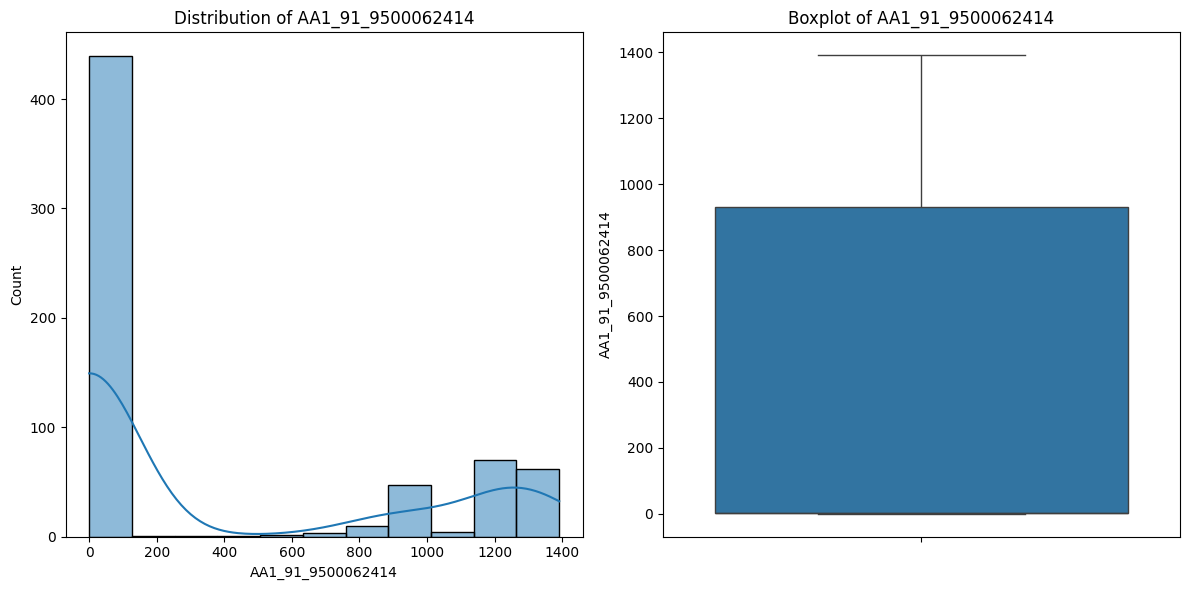


--- Summary Statistics for AA1_91_EP_NATURAL_GAS ---
count    640.000000
mean       0.701610
std        0.120362
min        0.110346
25%        0.713450
50%        0.731820
75%        0.754668
max        0.837520
Name: AA1_91_EP_NATURAL_GAS, dtype: float64


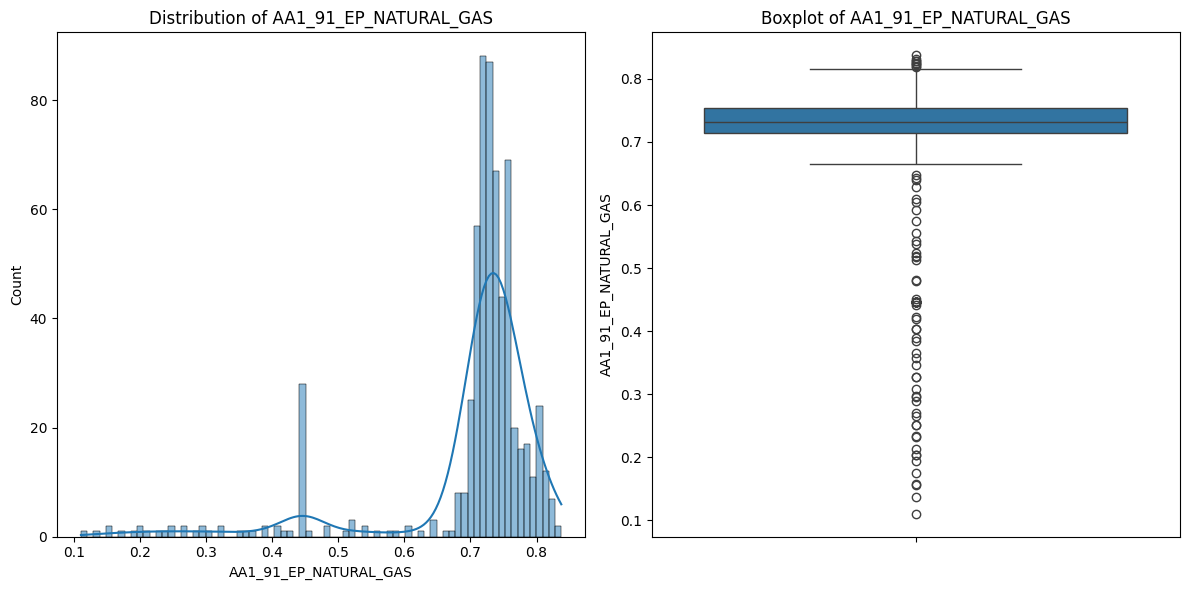


--- Summary Statistics for AA1_ANPR ---
count    640.000000
mean     233.629758
std       26.900387
min      113.360000
25%      235.140000
50%      238.725000
75%      242.872500
max      289.280000
Name: AA1_ANPR, dtype: float64


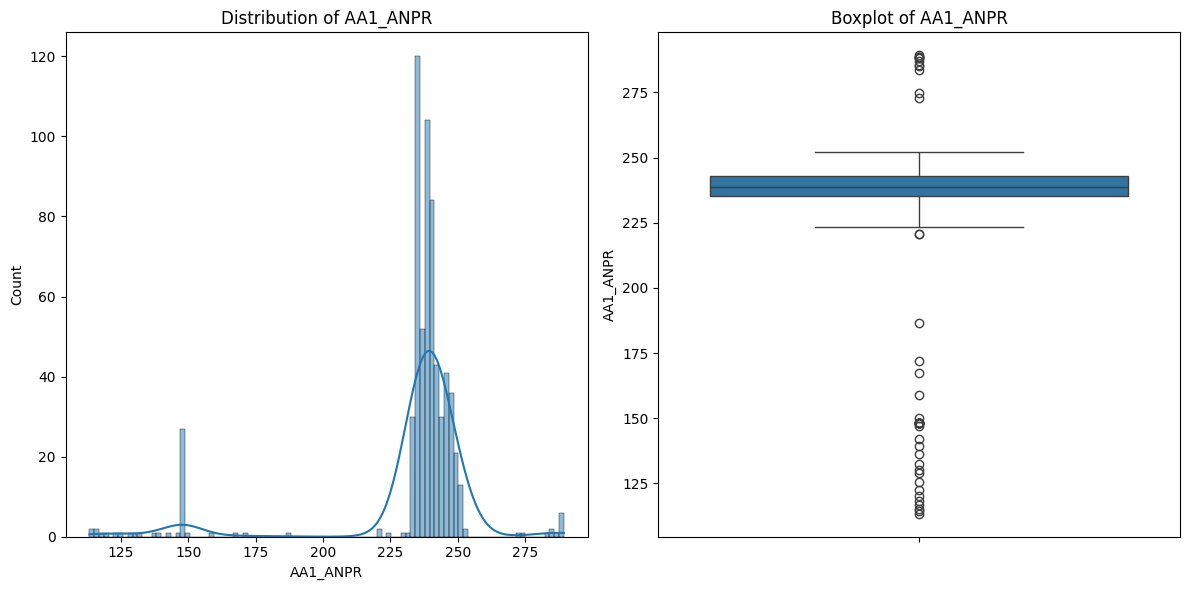


--- Summary Statistics for AA1_C_PR ---
count    640.000000
mean     153.416977
std        6.287389
min      141.510000
25%      150.242500
50%      151.570000
75%      152.795000
max      178.150000
Name: AA1_C_PR, dtype: float64


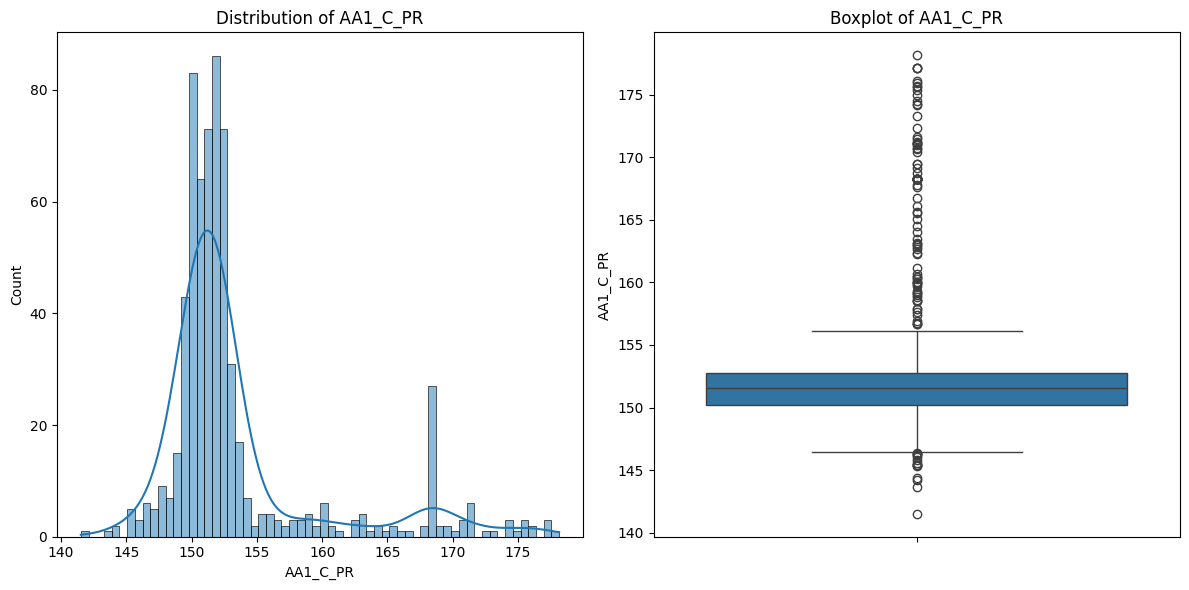


--- Summary Statistics for AA1_FBHP ---
count    640.000000
mean     243.718016
std        9.066104
min      231.520000
25%      235.845000
50%      242.125000
75%      250.420000
max      262.130000
Name: AA1_FBHP, dtype: float64


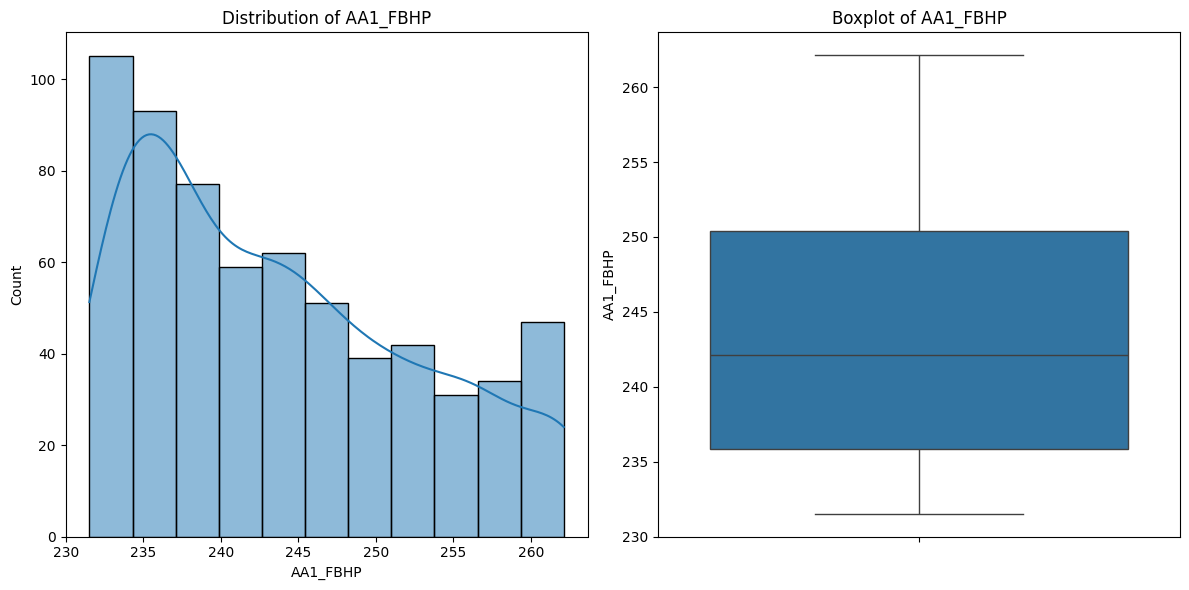


--- Summary Statistics for AA1_ANTP ---
count    640.000000
mean       7.069375
std        1.481381
min        2.800000
25%        6.900000
50%        7.400000
75%        8.000000
max       10.200000
Name: AA1_ANTP, dtype: float64


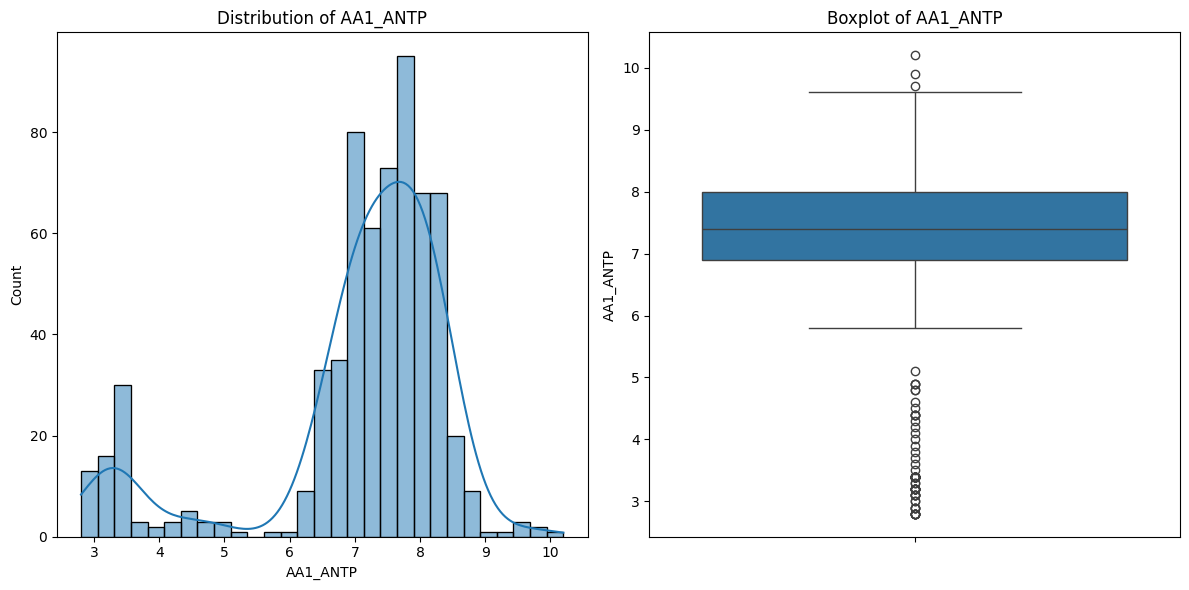


--- Summary Statistics for AA1_C_TE ---
count    640.000000
mean      17.522344
std        4.948215
min        2.600000
25%       18.600000
50%       19.100000
75%       19.500000
max       21.500000
Name: AA1_C_TE, dtype: float64


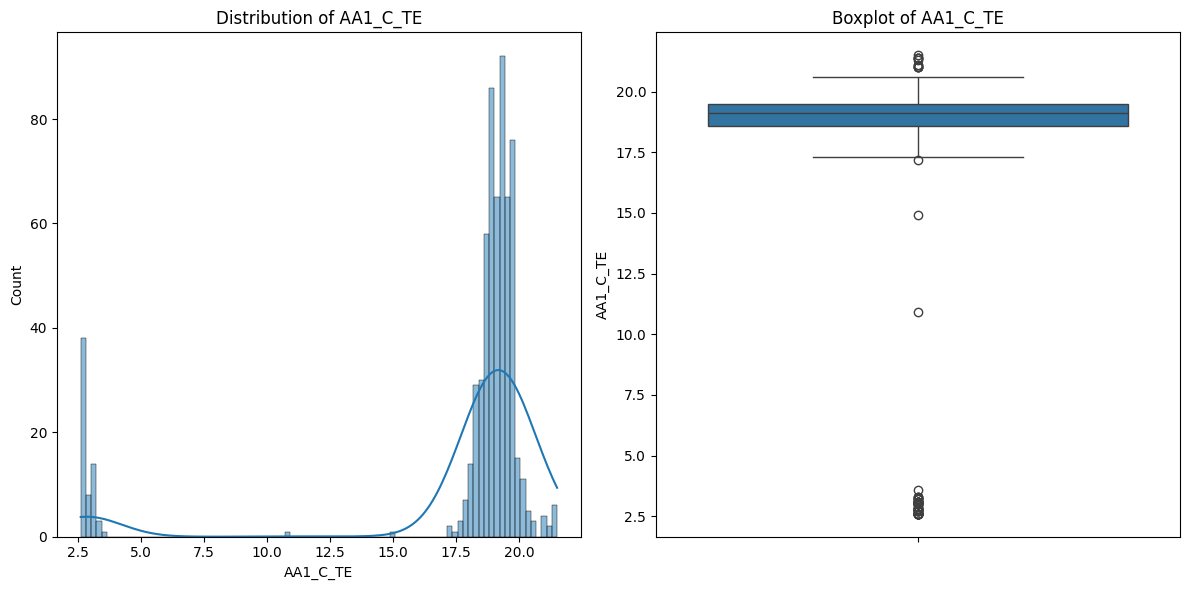


--- Summary Statistics for AA1_FBHT ---
count    640.000000
mean      37.608438
std        2.335470
min       28.800000
25%       38.300000
50%       38.300000
75%       38.400000
max       38.400000
Name: AA1_FBHT, dtype: float64


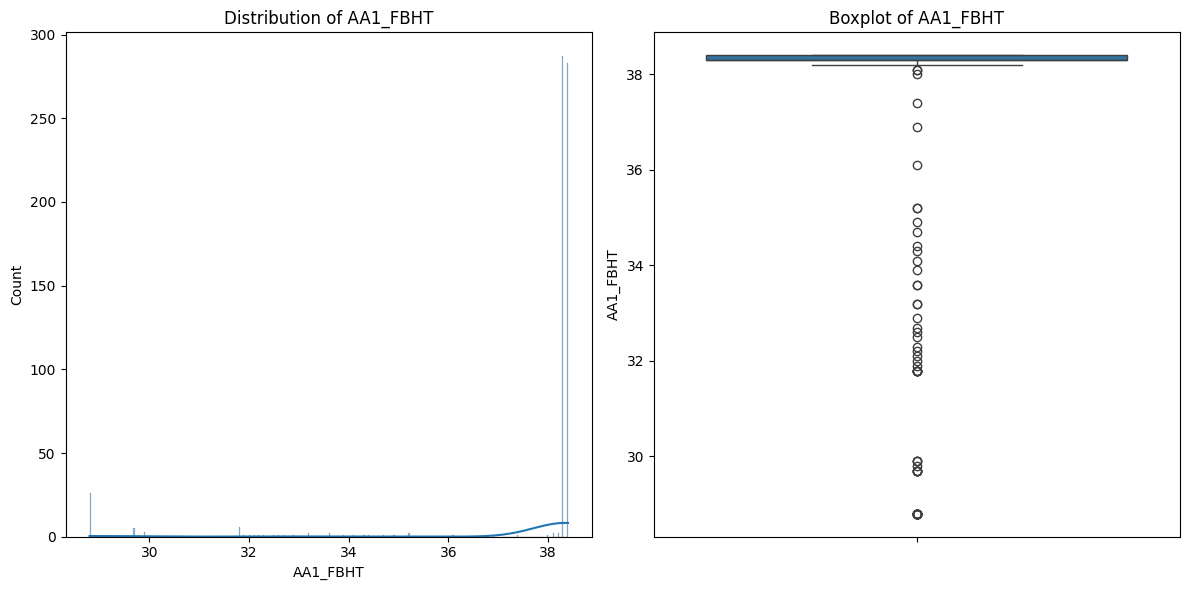


--- Summary Statistics for AA1_C_OP ---
count    640.000000
mean      21.008078
std        1.537974
min        9.620000
25%       20.190000
50%       21.150000
75%       22.120000
max       23.080000
Name: AA1_C_OP, dtype: float64


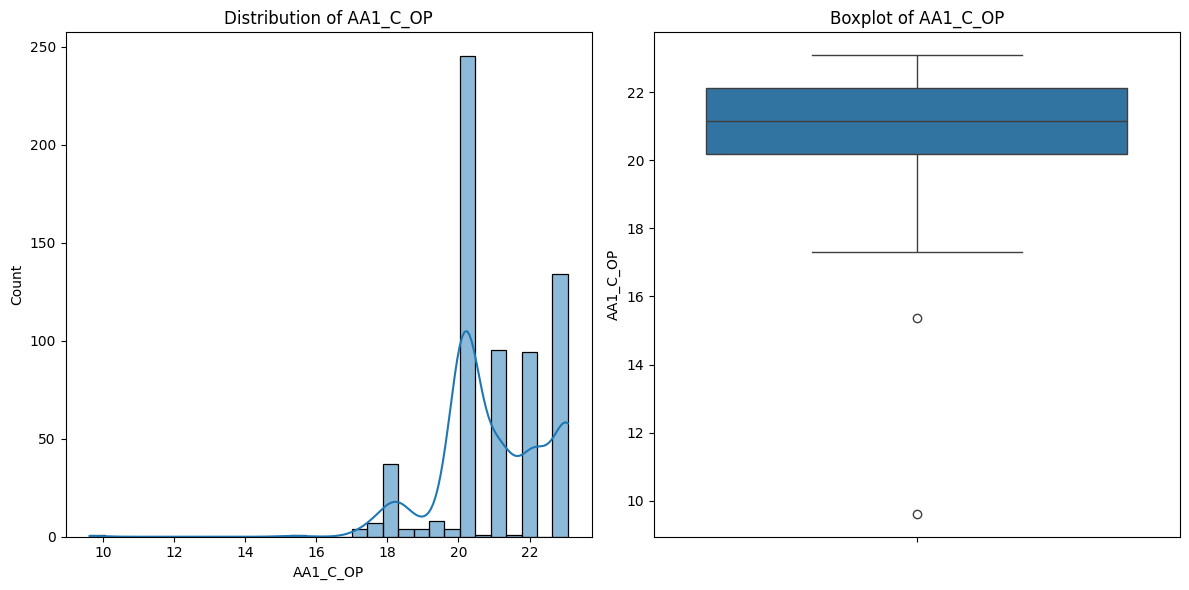


--- Summary Statistics for AA2 ---

--- Summary Statistics for AA2_91_9500062414 ---
count     640.000000
mean      535.652977
std       810.921789
min         0.050000
25%         1.850000
50%         1.910000
75%      1452.000000
max      2042.000000
Name: AA2_91_9500062414, dtype: float64


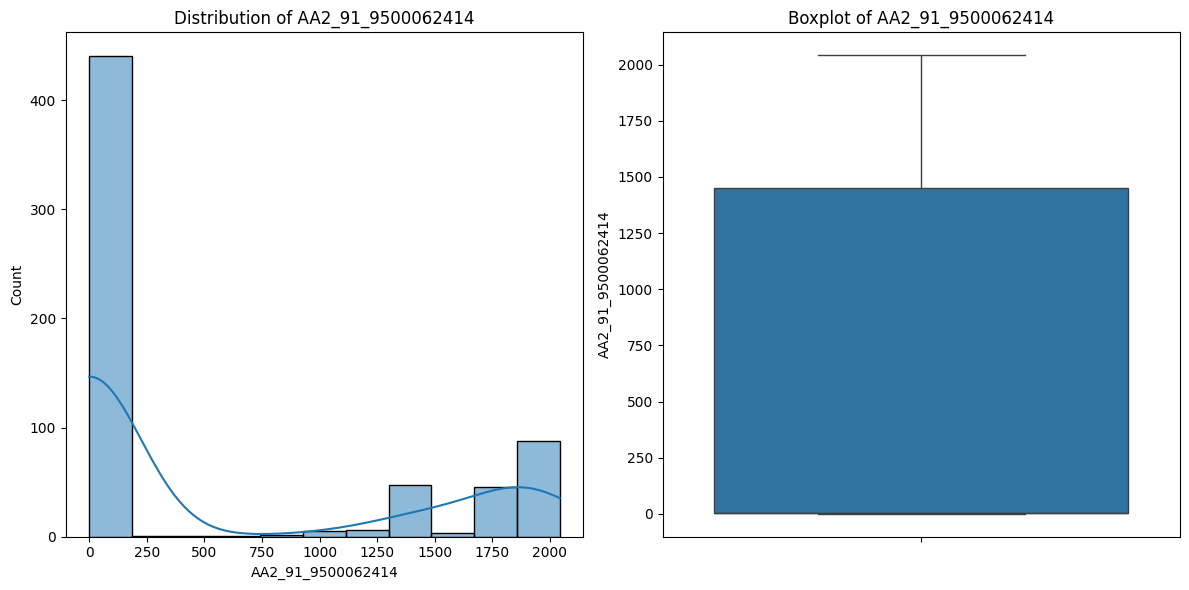


--- Summary Statistics for AA2_91_EP_NATURAL_GAS ---
count    640.000000
mean       1.030537
std        0.231283
min        0.026877
25%        1.056220
50%        1.096730
75%        1.123570
max        1.233450
Name: AA2_91_EP_NATURAL_GAS, dtype: float64


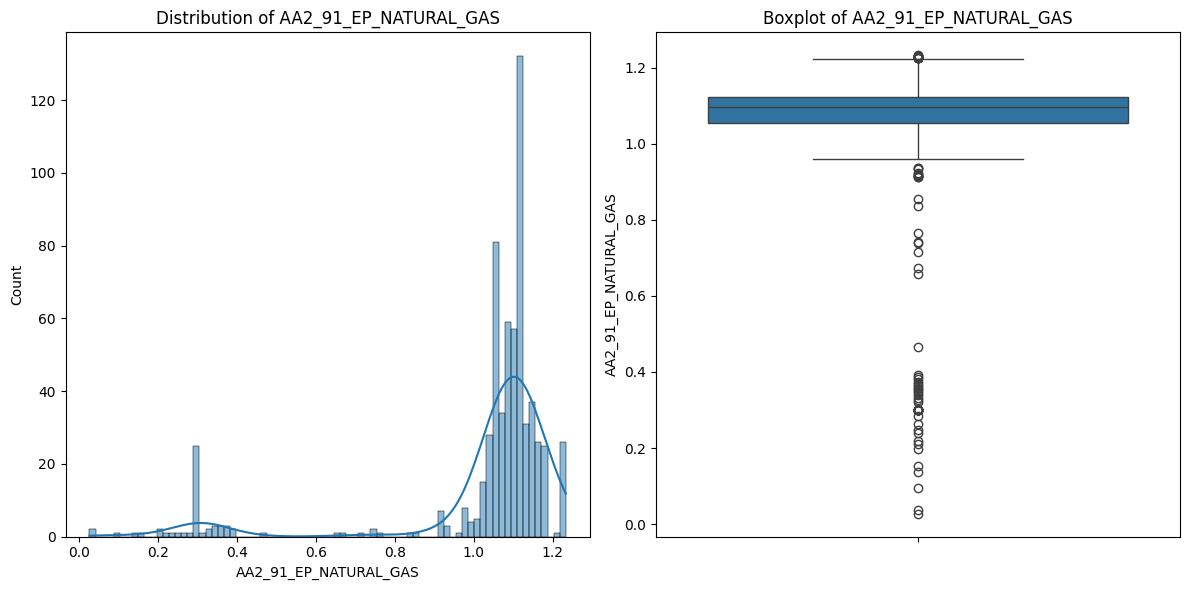


--- Summary Statistics for AA2_ANPR ---
count    640.000000
mean     250.059969
std       23.942075
min      136.110000
25%      237.170000
50%      247.240000
75%      271.552500
max      282.870000
Name: AA2_ANPR, dtype: float64


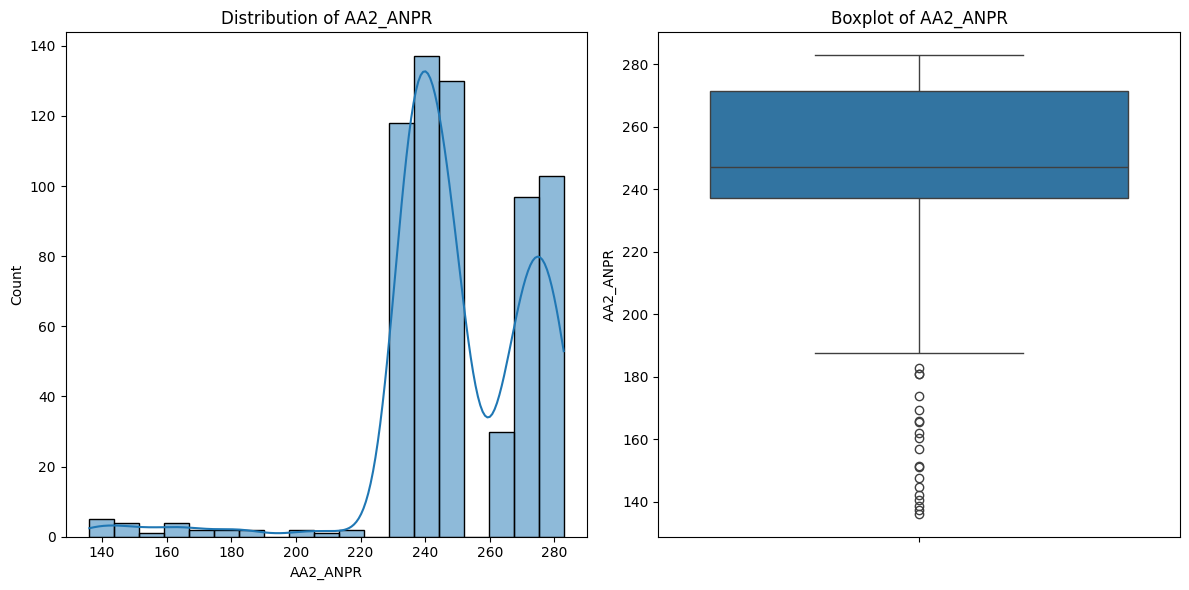


--- Summary Statistics for AA2_C_PR ---
count    640.000000
mean     154.838367
std        6.425726
min      140.740000
25%      151.615000
50%      152.915000
75%      154.232500
max      182.270000
Name: AA2_C_PR, dtype: float64


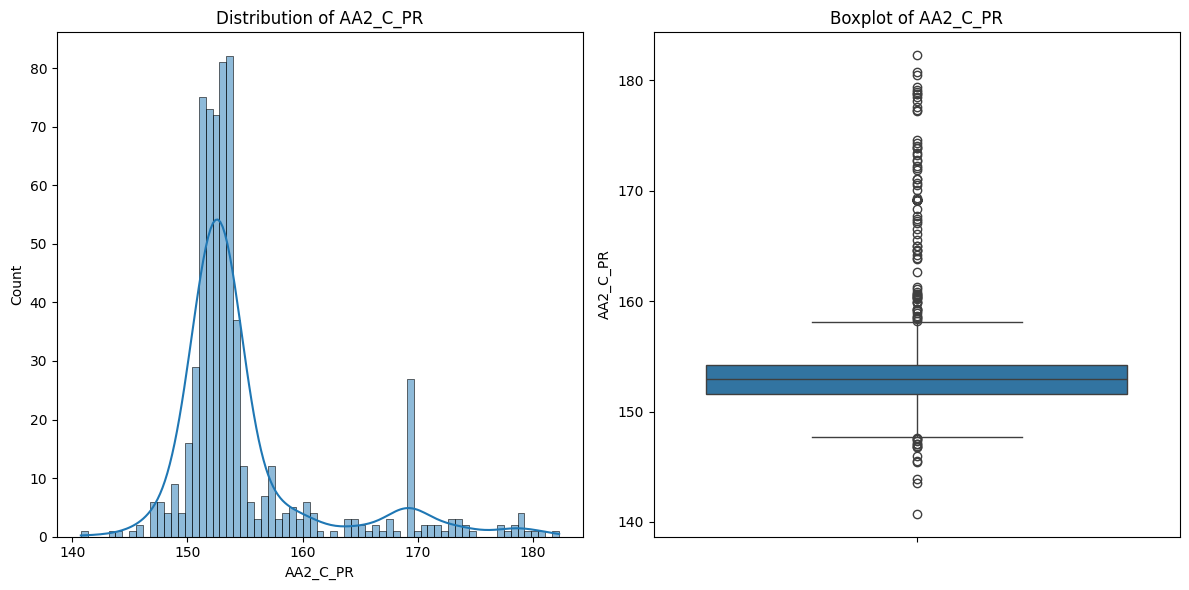


--- Summary Statistics for AA2_FBHP ---
count    640.000000
mean     244.339547
std        8.904108
min      231.010000
25%      236.972500
50%      242.810000
75%      251.567500
max      262.260000
Name: AA2_FBHP, dtype: float64


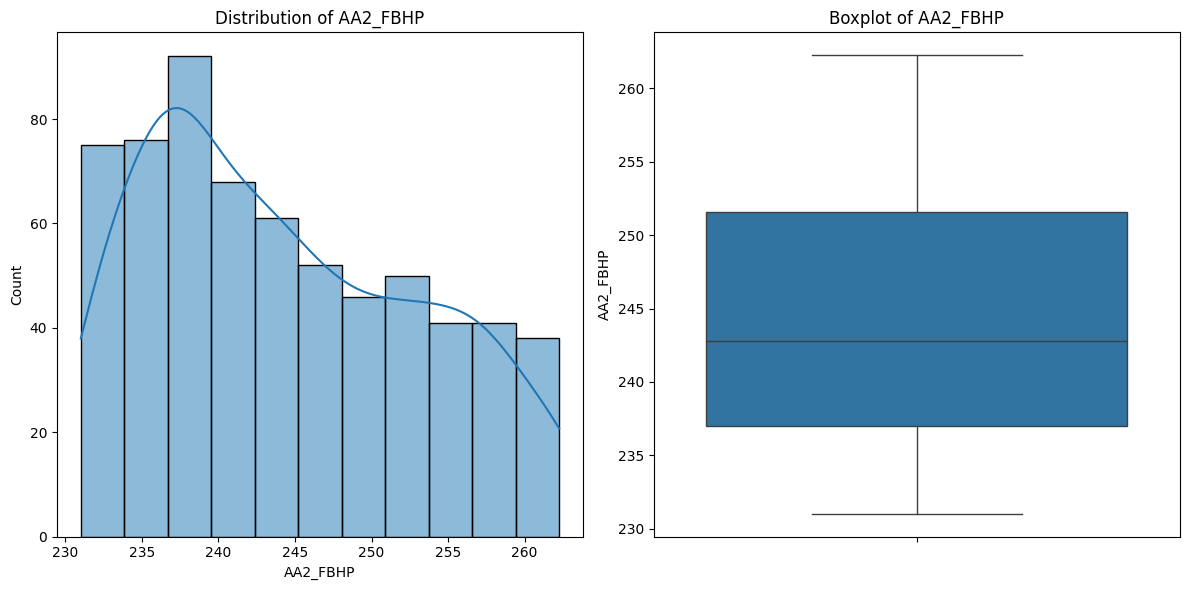


--- Summary Statistics for AA2_ANTP ---
count    640.000000
mean       6.524453
std        1.692305
min        3.500000
25%        4.800000
50%        7.050000
75%        7.900000
max       10.300000
Name: AA2_ANTP, dtype: float64


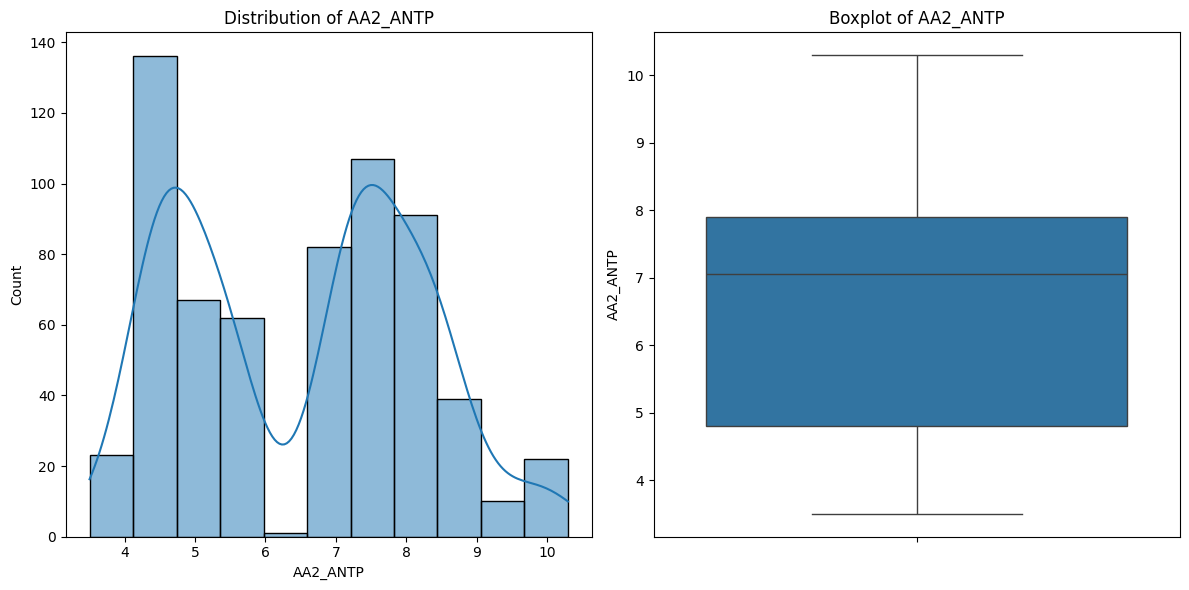


--- Summary Statistics for AA2_C_TE ---
count    640.000000
mean      19.375391
std        0.972233
min       14.600000
25%       18.875000
50%       19.400000
75%       19.900000
max       22.800000
Name: AA2_C_TE, dtype: float64


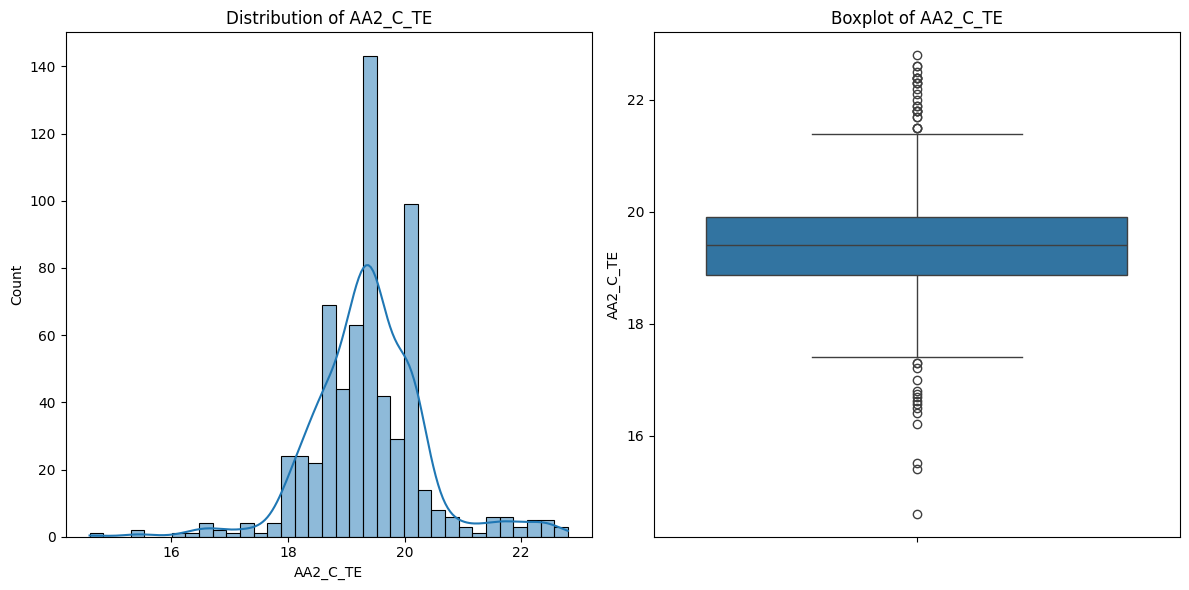


--- Summary Statistics for AA2_FBHT ---
count    640.000000
mean      36.482969
std        0.914382
min       30.000000
25%       36.600000
50%       36.700000
75%       36.700000
max       36.800000
Name: AA2_FBHT, dtype: float64


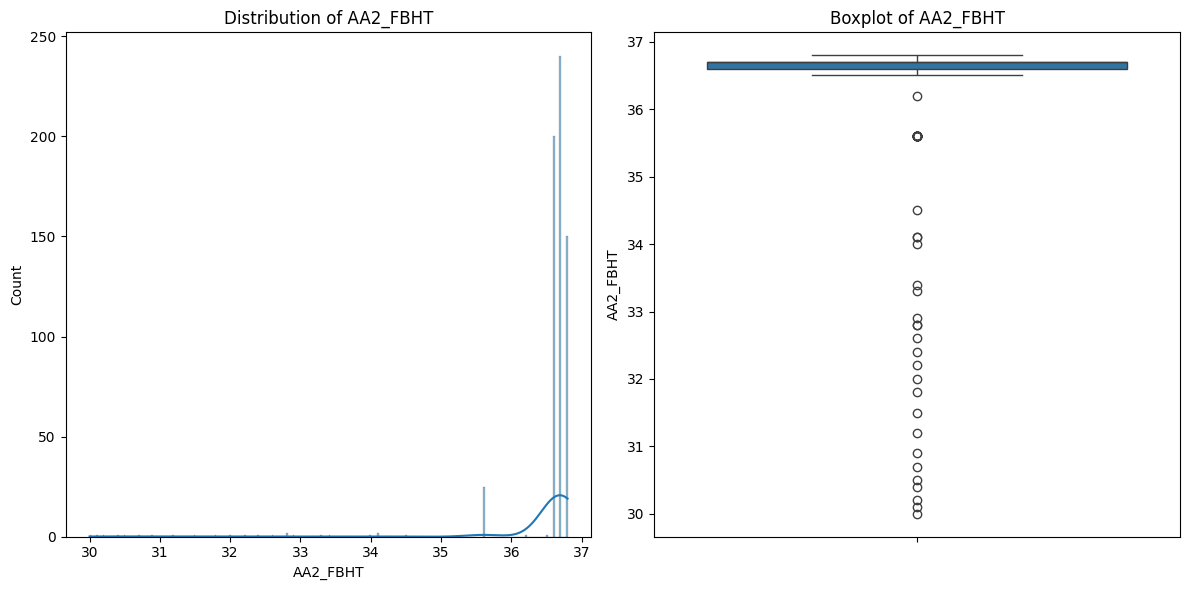


--- Summary Statistics for AA2_C_OP ---
count    640.000000
mean      30.151367
std        3.104654
min       15.530000
25%       28.160000
50%       30.100000
75%       31.555000
max       34.950000
Name: AA2_C_OP, dtype: float64


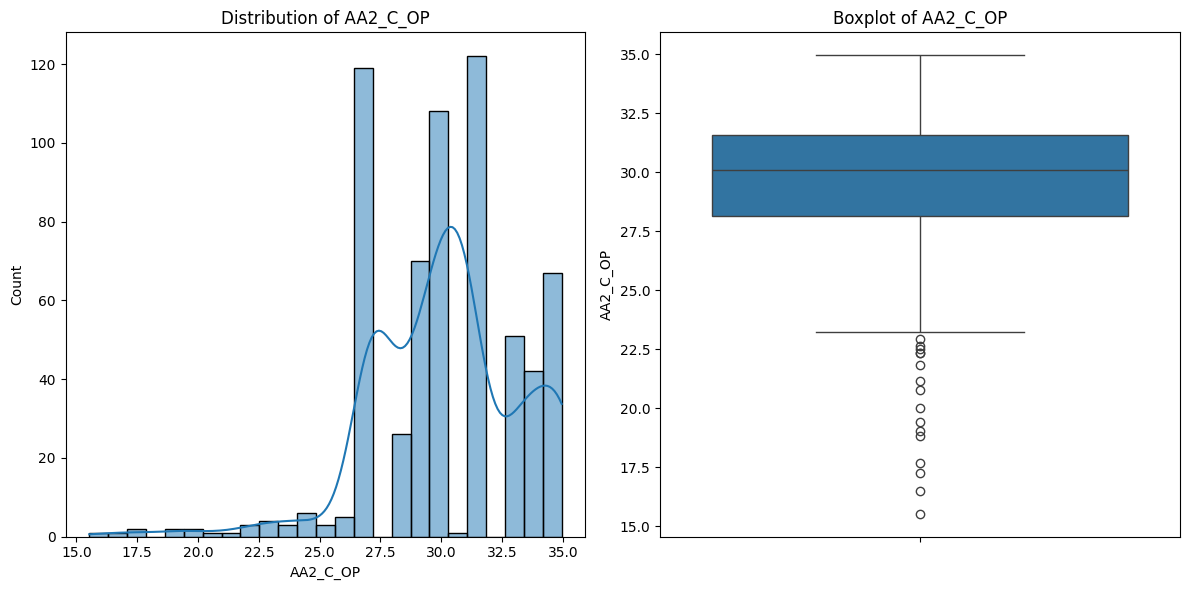


--- Summary Statistics for AA3 ---

--- Summary Statistics for AA3_91_9500062414 ---
count     640.000000
mean      887.971688
std      1341.577924
min         0.880000
25%         2.980000
50%         3.140000
75%      2377.000000
max      3307.000000
Name: AA3_91_9500062414, dtype: float64


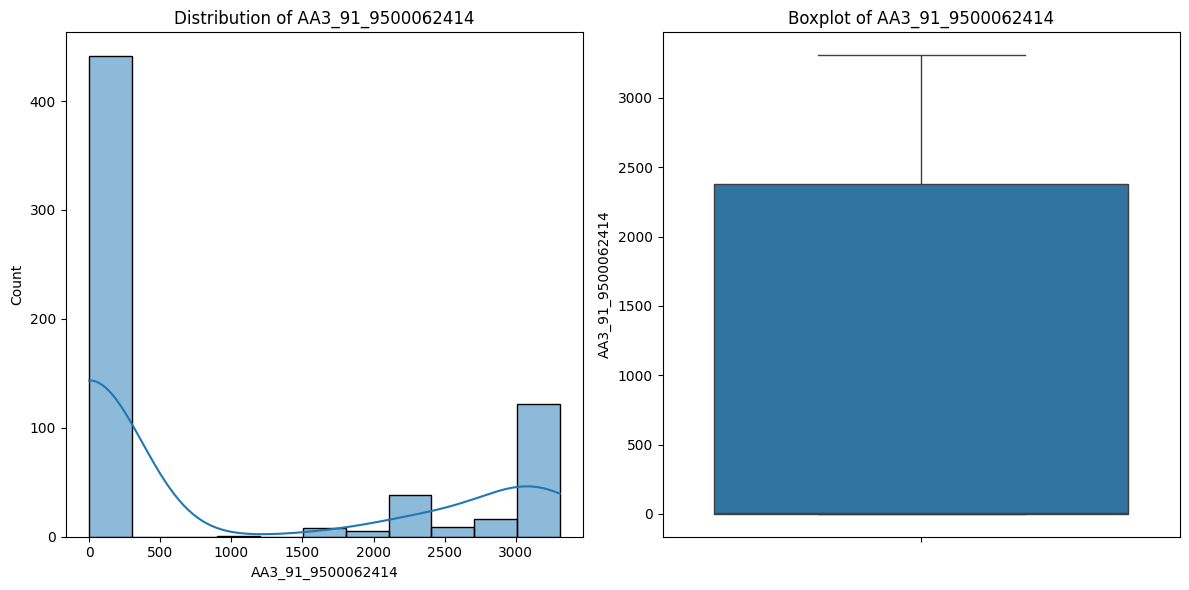


--- Summary Statistics for AA3_91_EP_NATURAL_GAS ---
count    640.000000
mean       1.662134
std        0.445903
min        0.000814
25%        1.733825
50%        1.827390
75%        1.855413
max        1.895640
Name: AA3_91_EP_NATURAL_GAS, dtype: float64


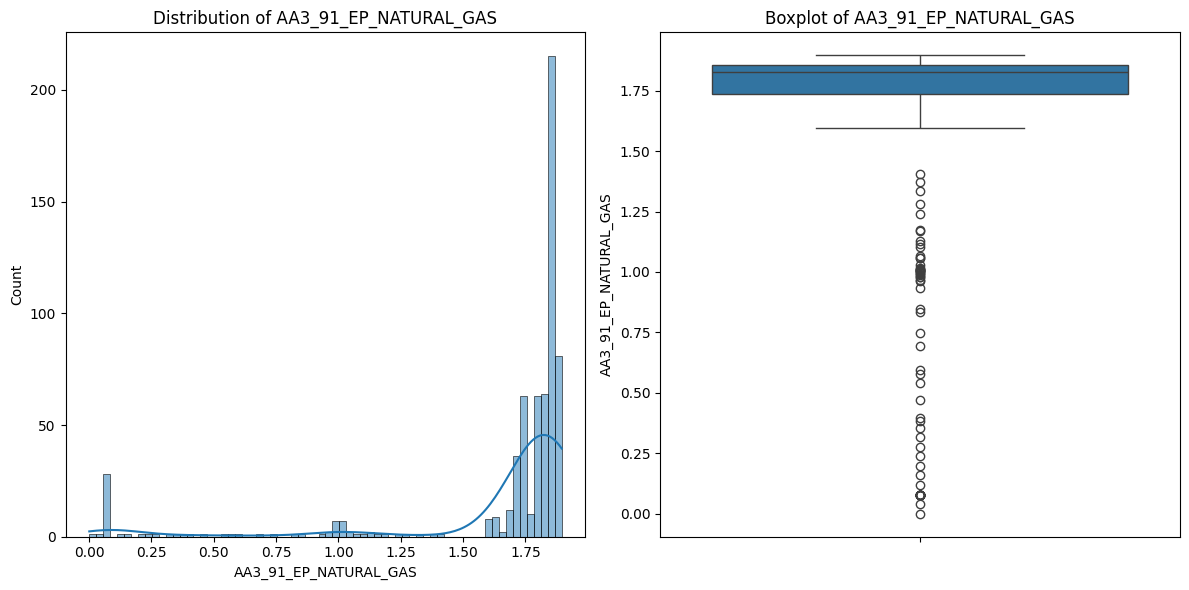


--- Summary Statistics for AA3_ANPR ---
count    640.000000
mean     293.640102
std       18.634736
min      222.890000
25%      282.517500
50%      288.290000
75%      312.320000
max      331.000000
Name: AA3_ANPR, dtype: float64


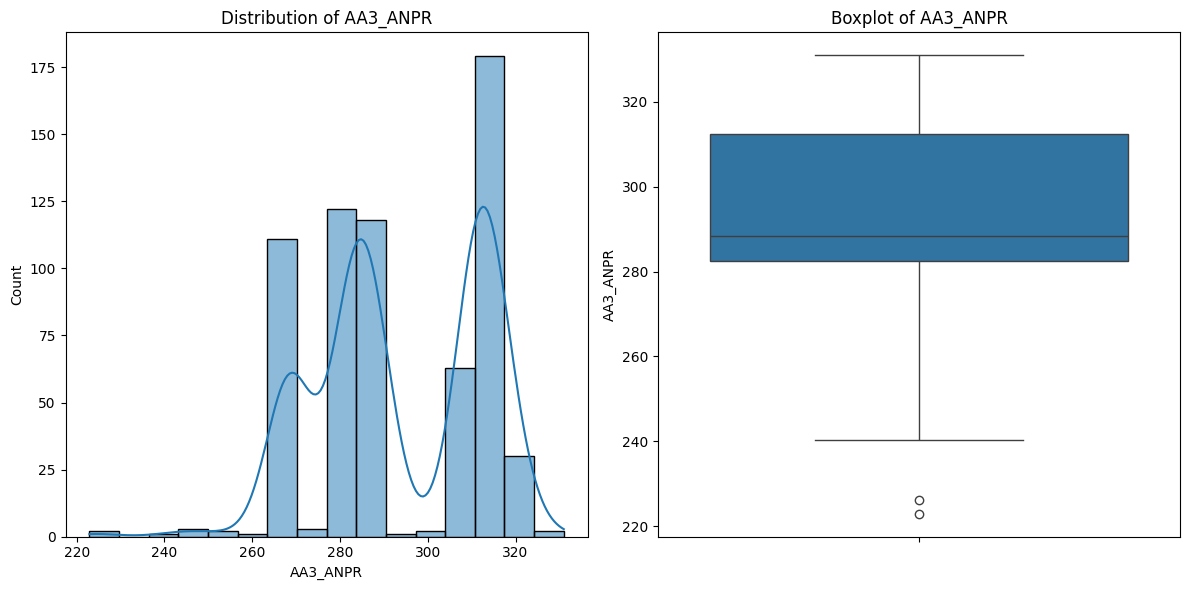


--- Summary Statistics for AA3_C_PR ---
count    640.000000
mean     130.720719
std        5.313043
min      123.180000
25%      128.107500
50%      129.250000
75%      130.112500
max      151.400000
Name: AA3_C_PR, dtype: float64


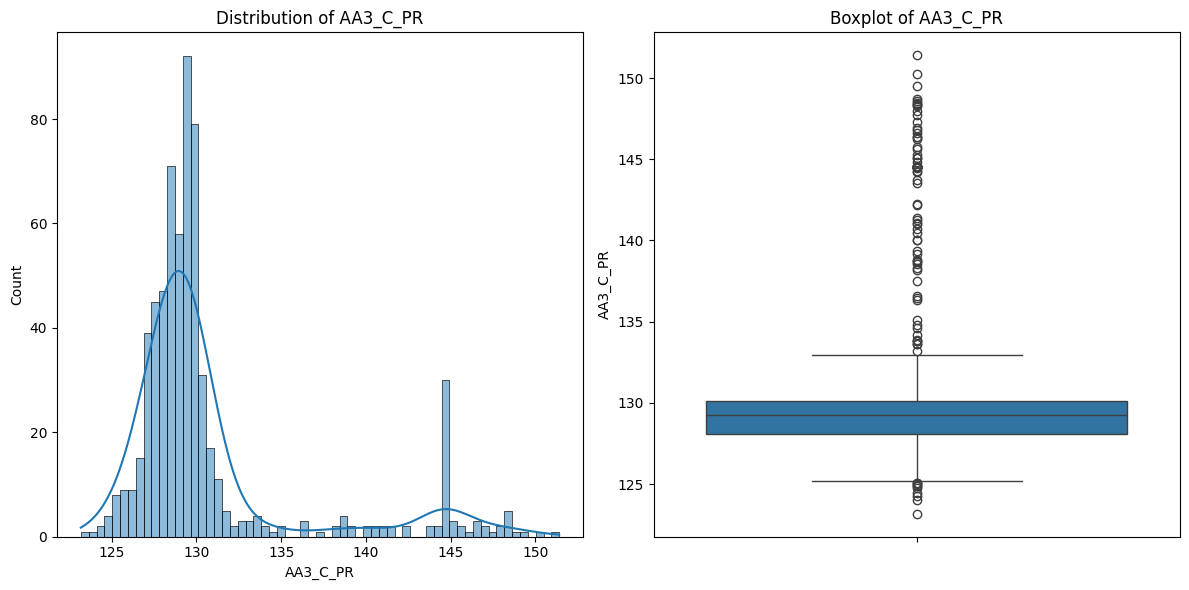


--- Summary Statistics for AA3_FBHP ---
count    640.000000
mean     304.879359
std        8.694263
min      291.270000
25%      297.495000
50%      303.900000
75%      311.337500
max      322.390000
Name: AA3_FBHP, dtype: float64


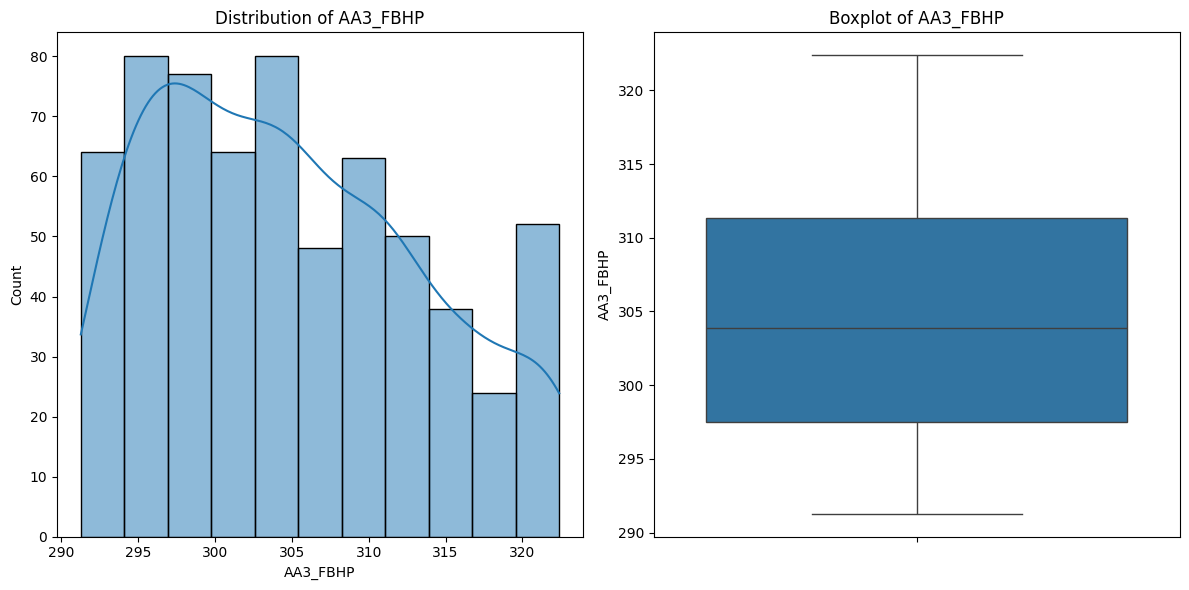


--- Summary Statistics for AA3_ANTP ---
count    640.000000
mean      14.629297
std        2.854528
min        6.100000
25%       13.700000
50%       15.400000
75%       16.600000
max       19.900000
Name: AA3_ANTP, dtype: float64


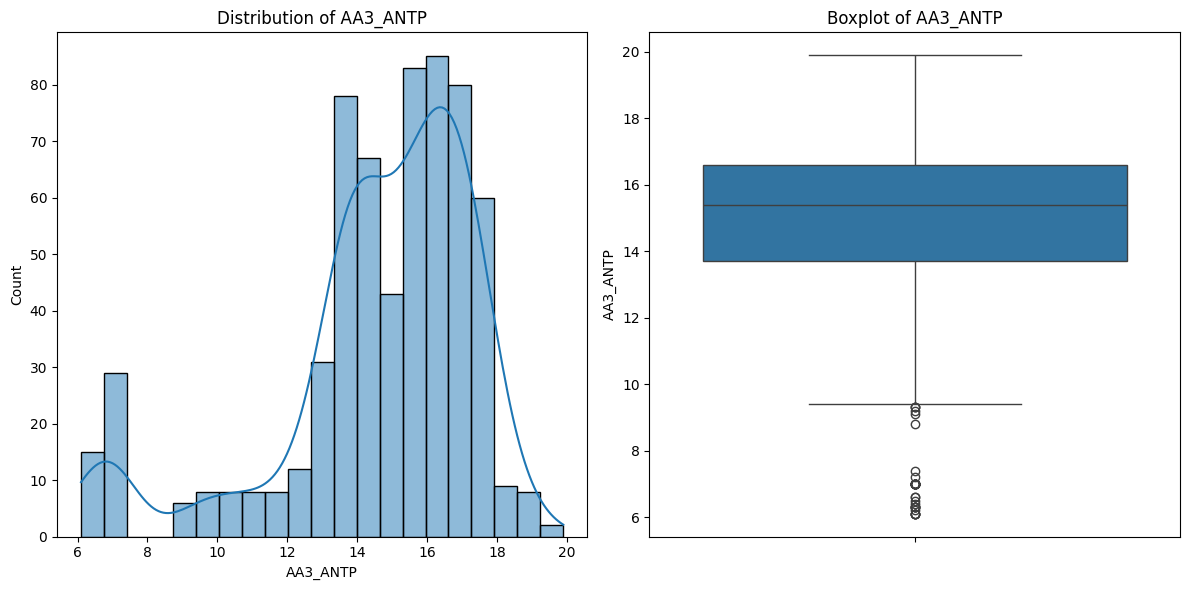


--- Summary Statistics for AA3_C_TE ---
count    640.000000
mean      57.511484
std        9.121826
min       14.900000
25%       58.800000
50%       59.900000
75%       60.300000
max       61.200000
Name: AA3_C_TE, dtype: float64


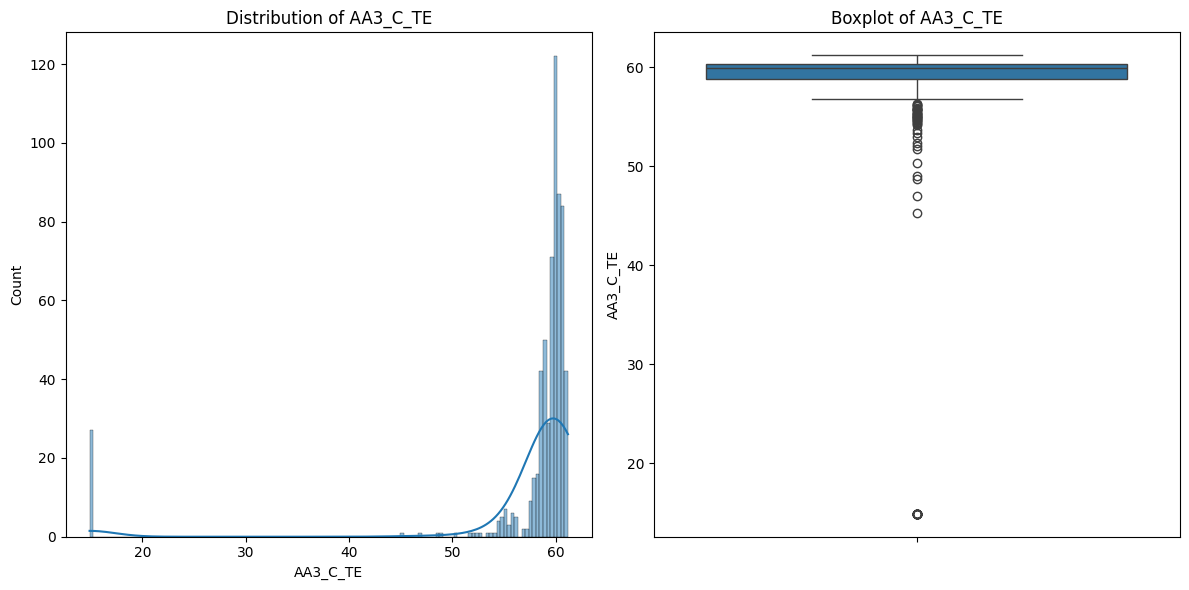


--- Summary Statistics for AA3_FBHT ---
count    640.000000
mean      92.716406
std        0.350358
min       89.900000
25%       92.700000
50%       92.800000
75%       92.800000
max       93.000000
Name: AA3_FBHT, dtype: float64


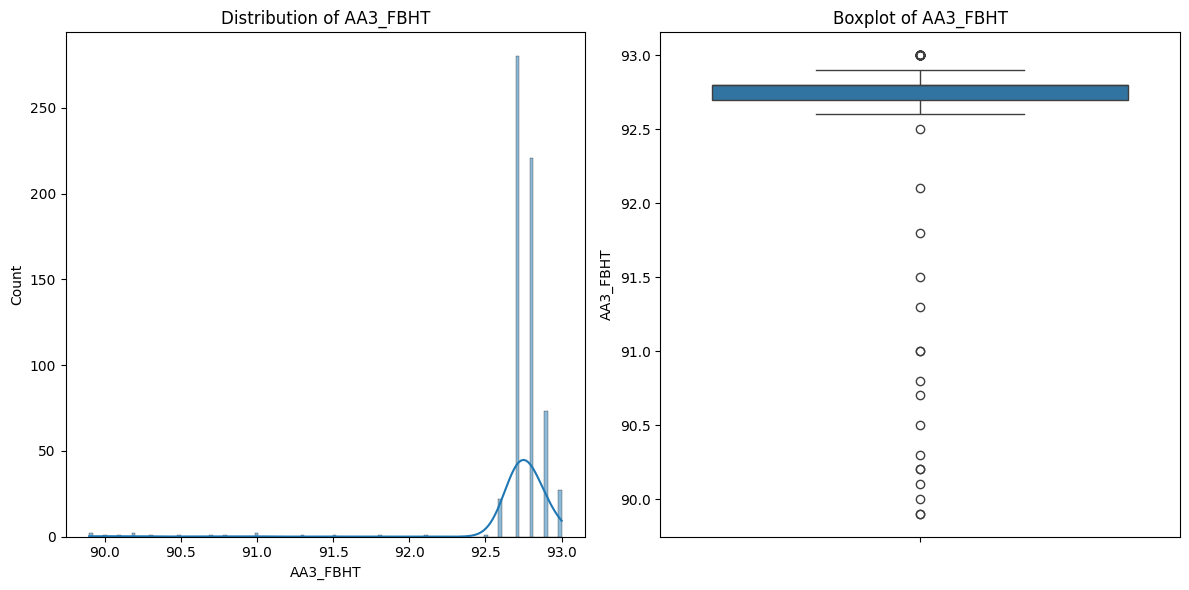


--- Summary Statistics for AA3_C_OP ---
count    640.000000
mean      37.443258
std        5.977497
min       15.380000
25%       37.500000
50%       39.420000
75%       40.380000
max       42.310000
Name: AA3_C_OP, dtype: float64


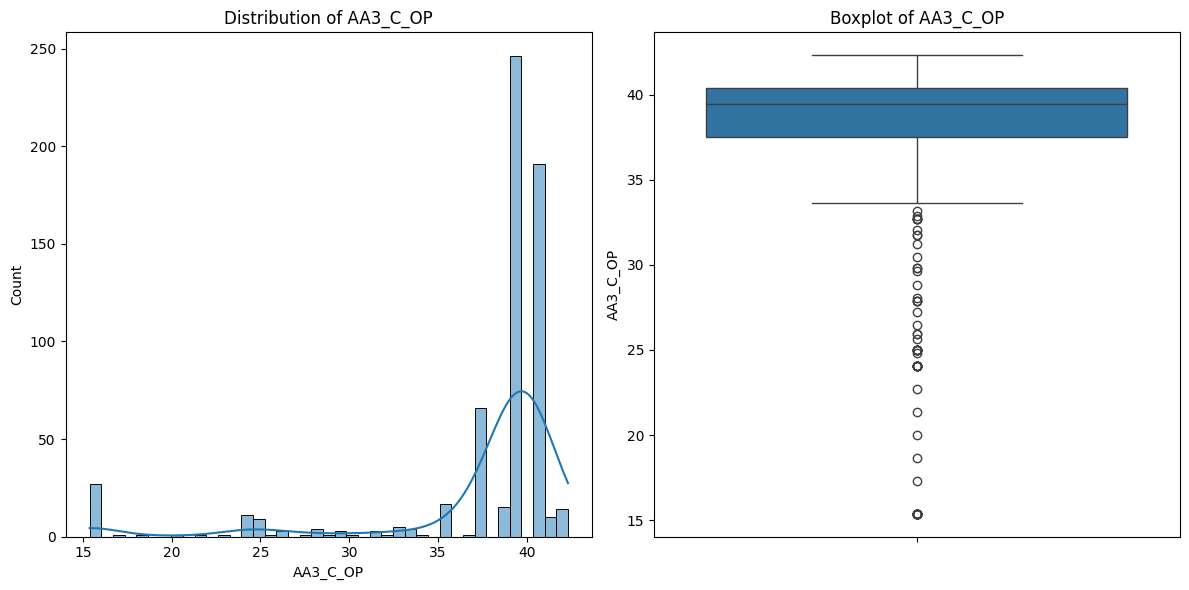


--- Summary Statistics for AA4 ---

--- Summary Statistics for AA4_91_9500062414 ---
count     640.000000
mean      579.550391
std       875.699018
min         0.850000
25%         2.070000
50%         2.140000
75%      1618.000000
max      2222.000000
Name: AA4_91_9500062414, dtype: float64


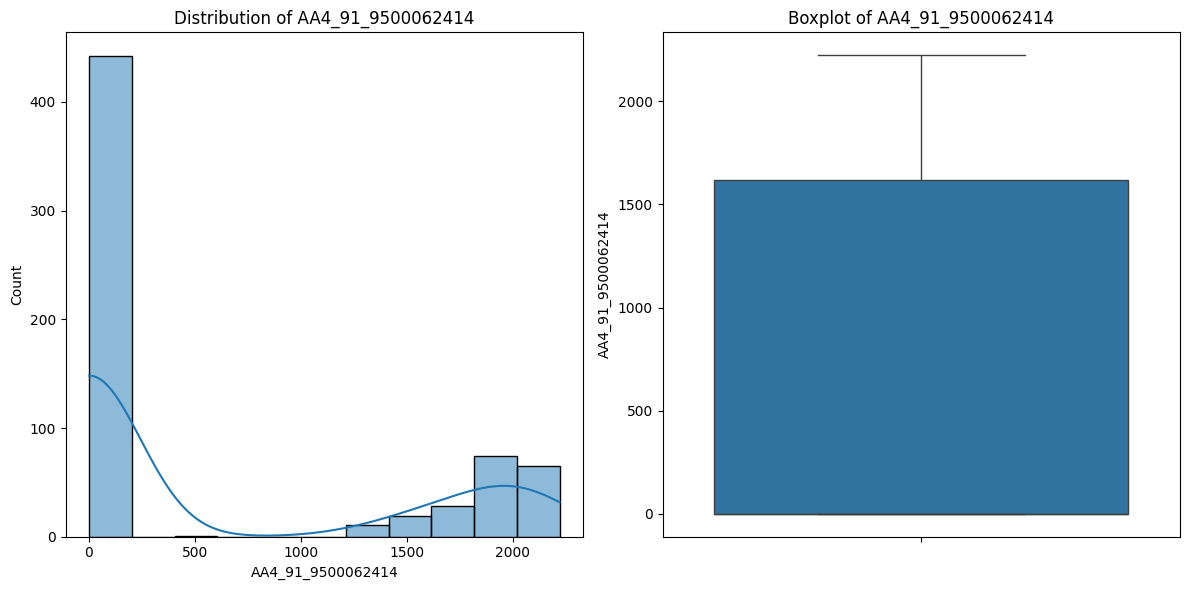


--- Summary Statistics for AA4_91_EP_NATURAL_GAS ---
count    640.000000
mean       1.124571
std        0.265889
min        0.127751
25%        1.136005
50%        1.216505
75%        1.240915
max        1.309630
Name: AA4_91_EP_NATURAL_GAS, dtype: float64


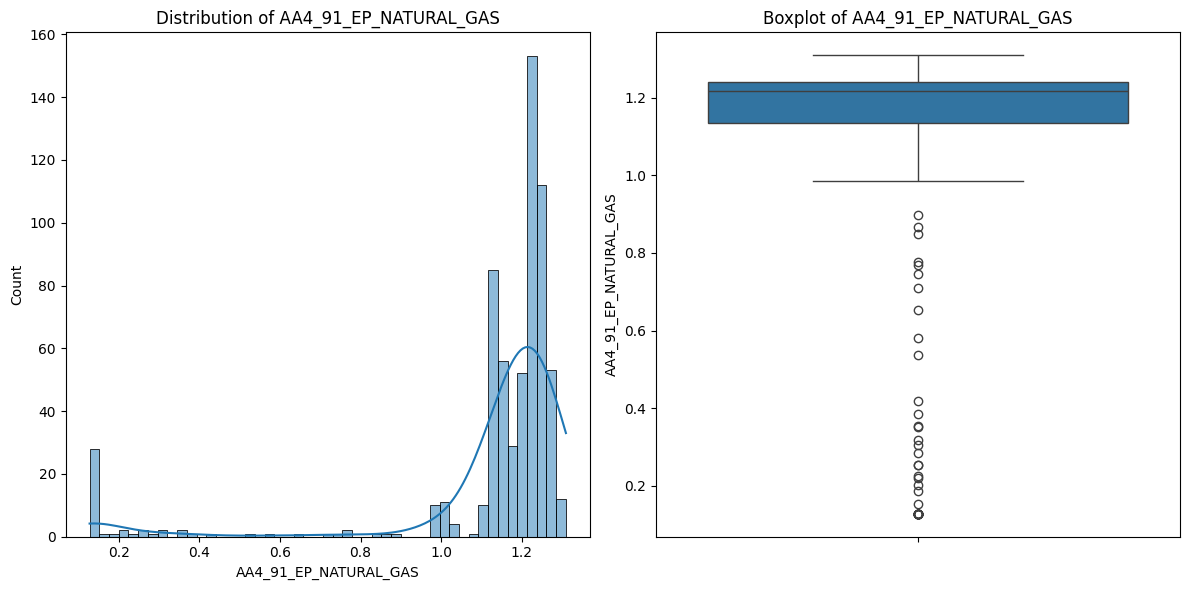


--- Summary Statistics for AA4_ANPR ---
count    640.000000
mean     212.331305
std       34.545049
min      175.600000
25%      179.180000
50%      221.245000
75%      244.545000
max      271.920000
Name: AA4_ANPR, dtype: float64


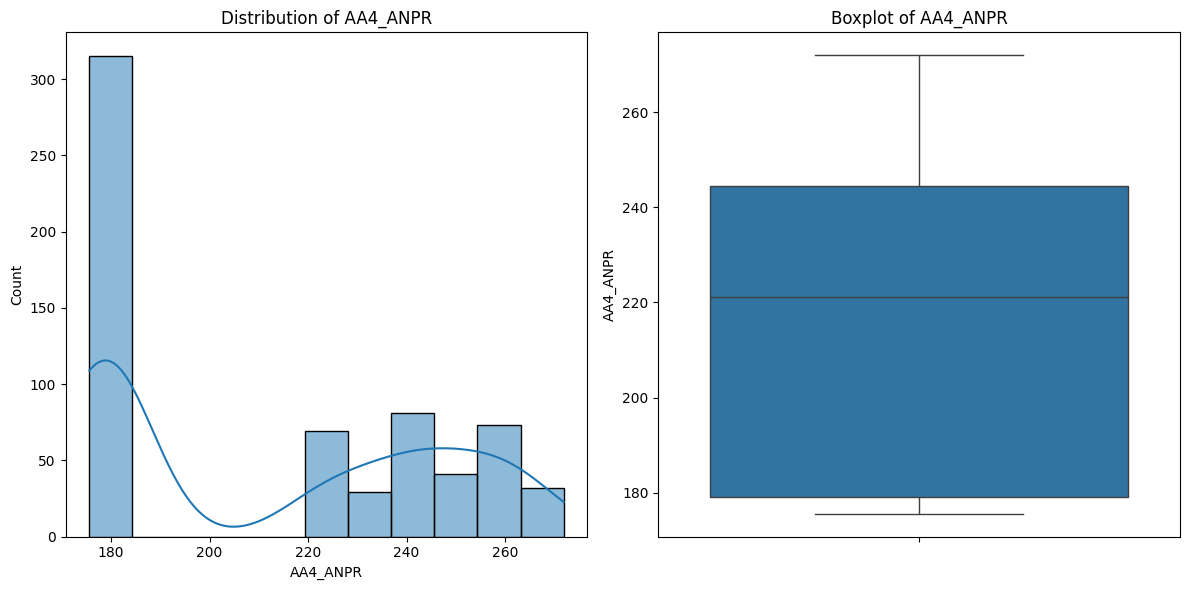


--- Summary Statistics for AA4_C_PR ---
count    640.000000
mean     142.776430
std        5.923521
min      133.120000
25%      139.987500
50%      141.105000
75%      142.052500
max      164.650000
Name: AA4_C_PR, dtype: float64


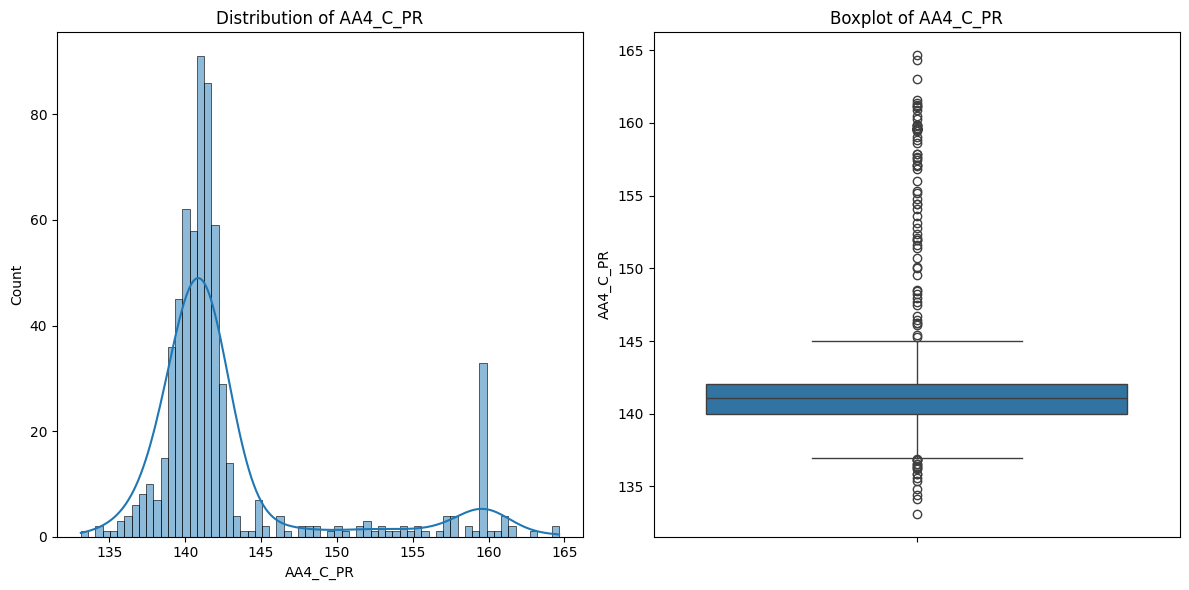


--- Summary Statistics for AA4_FBHP ---
count    640.000000
mean     236.488547
std        9.069887
min      220.730000
25%      228.867500
50%      237.375000
75%      242.997500
max      254.810000
Name: AA4_FBHP, dtype: float64


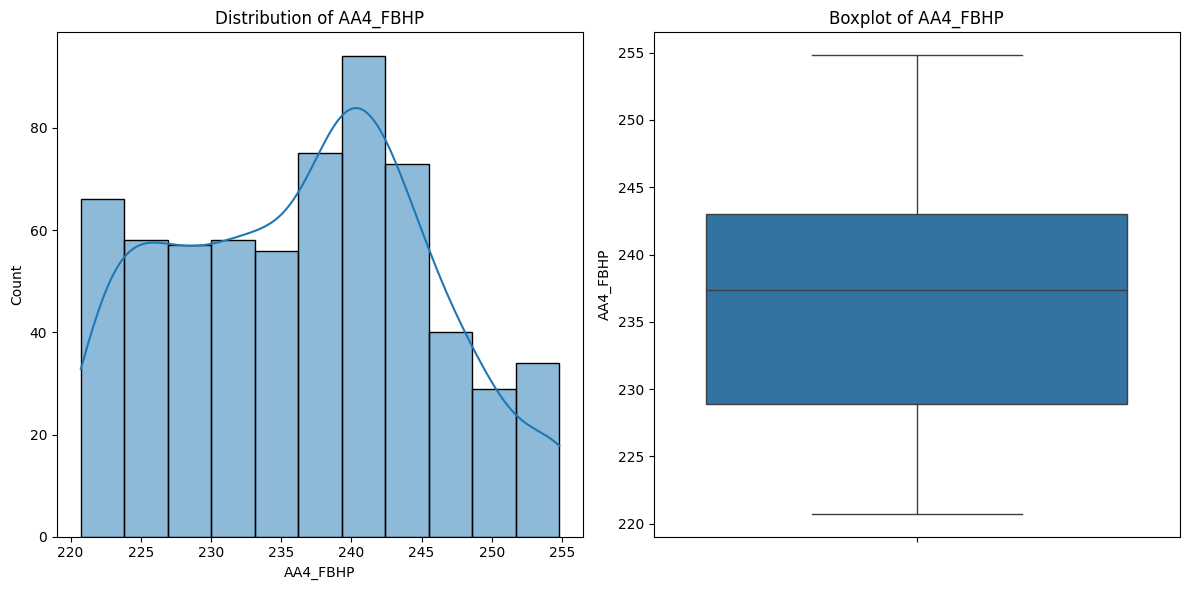


--- Summary Statistics for AA4_ANTP ---
count    640.000000
mean      10.963750
std        2.916388
min        4.100000
25%       10.700000
50%       11.400000
75%       13.100000
max       18.100000
Name: AA4_ANTP, dtype: float64


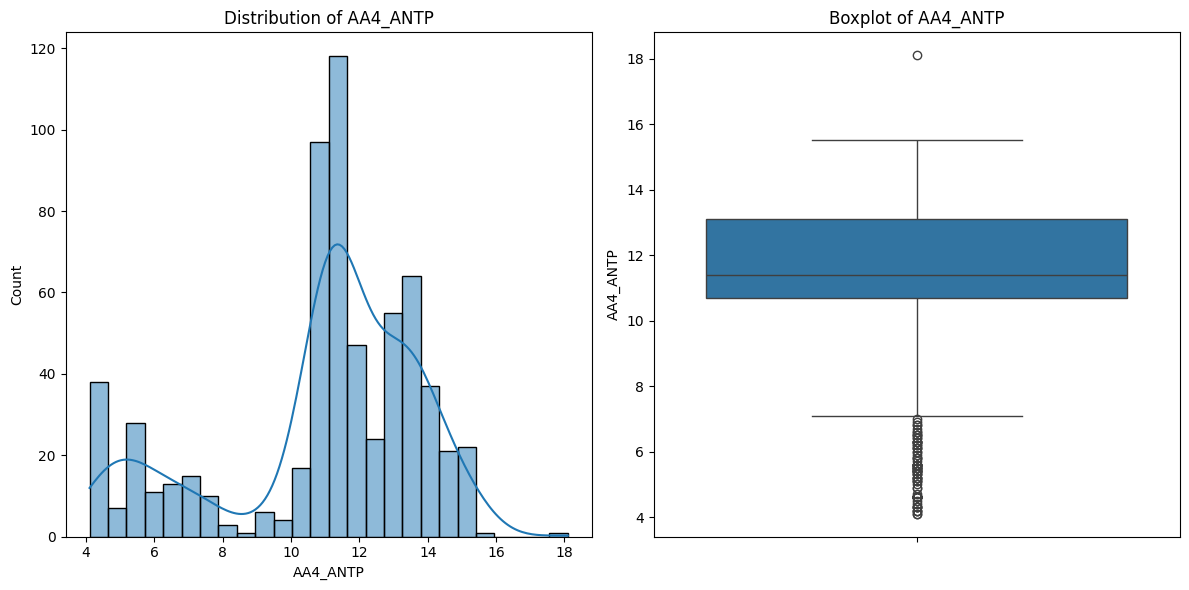


--- Summary Statistics for AA4_C_TE ---
count    640.000000
mean      28.183906
std        1.078805
min       24.700000
25%       27.700000
50%       28.400000
75%       28.900000
max       30.500000
Name: AA4_C_TE, dtype: float64


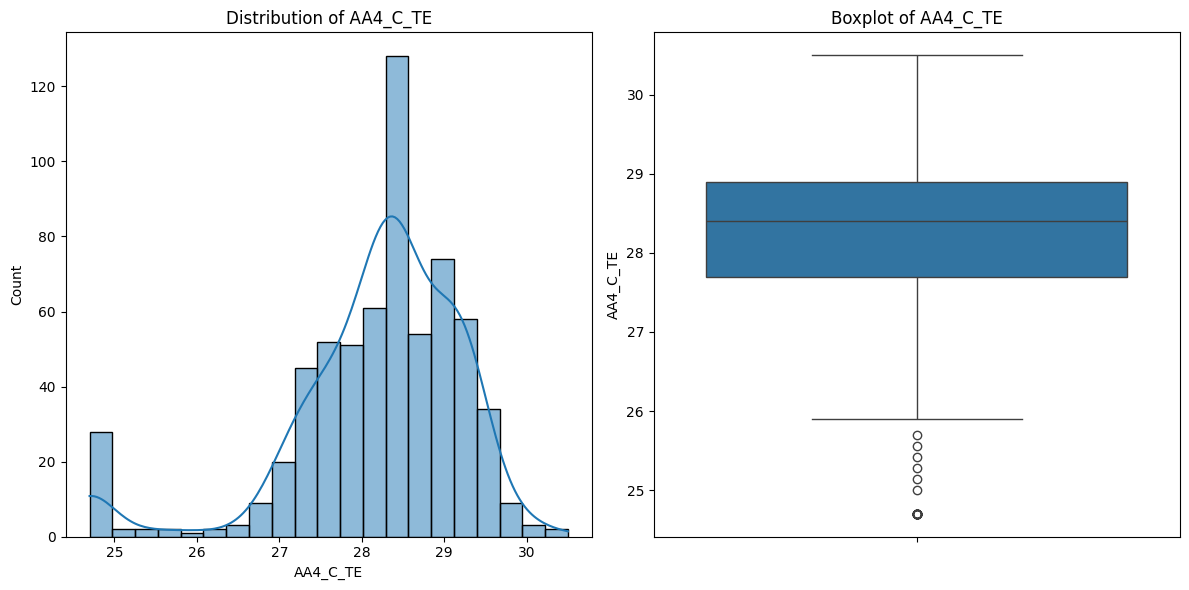


--- Summary Statistics for AA4_FBHT ---
count    640.000000
mean      47.575156
std        2.327241
min       37.200000
25%       48.000000
50%       48.100000
75%       48.300000
max       48.400000
Name: AA4_FBHT, dtype: float64


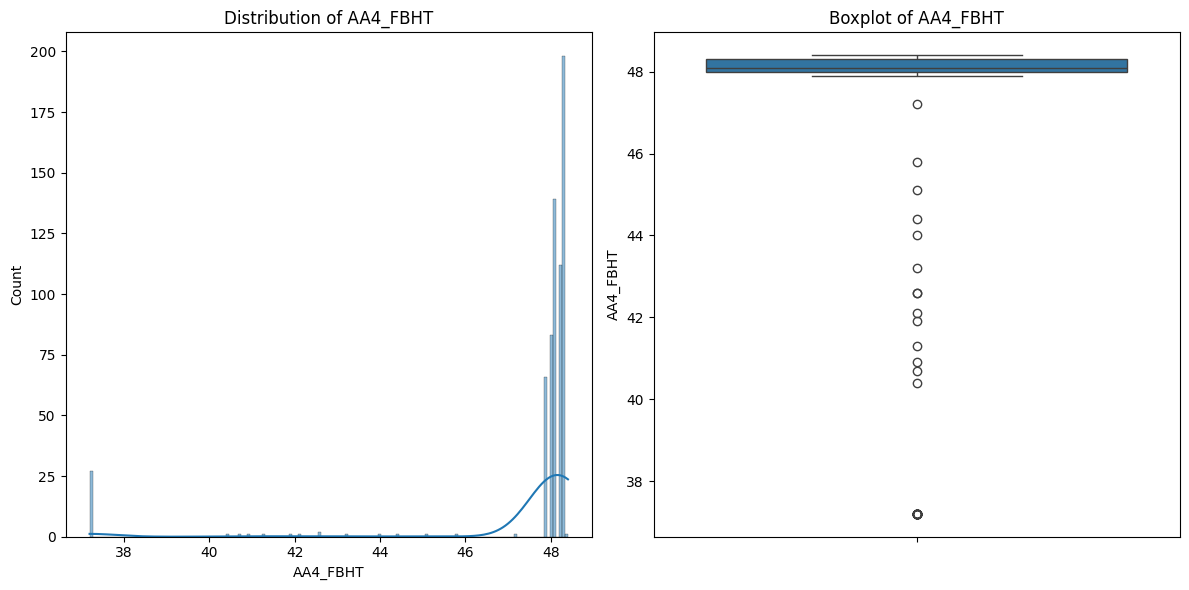


--- Summary Statistics for AA4_C_OP ---
count    640.000000
mean      33.245797
std        3.023950
min       20.950000
25%       34.290000
50%       34.290000
75%       34.290000
max       35.240000
Name: AA4_C_OP, dtype: float64


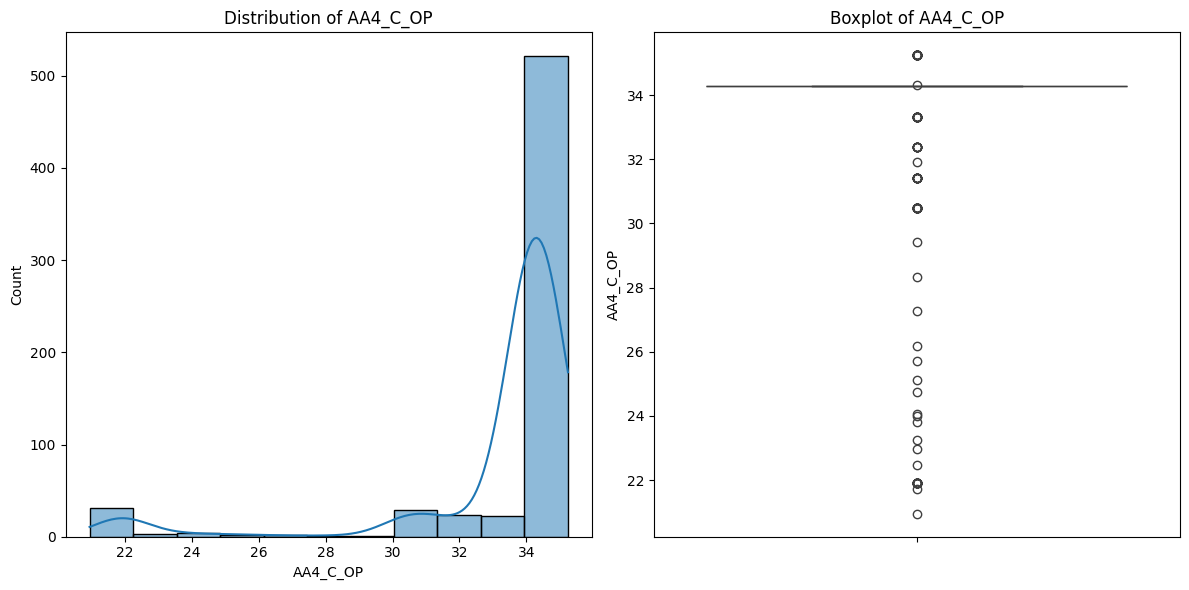


--- Summary Statistics for AA5 ---

--- Summary Statistics for AA5_91_9500062414 ---
count     640.000000
mean      641.163063
std       971.568942
min         0.130000
25%         2.140000
50%         2.190000
75%      1578.000000
max      2568.000000
Name: AA5_91_9500062414, dtype: float64


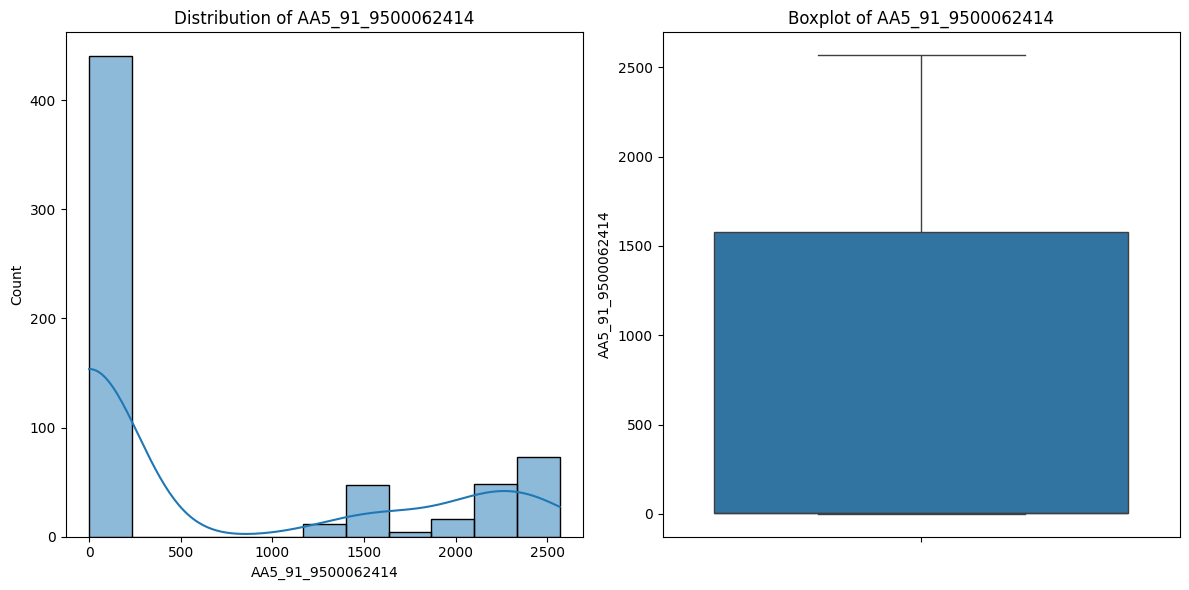


--- Summary Statistics for AA5_91_EP_NATURAL_GAS ---
count    640.000000
mean       1.221825
std        0.258098
min        0.076988
25%        1.205185
50%        1.245485
75%        1.402830
max        1.486240
Name: AA5_91_EP_NATURAL_GAS, dtype: float64


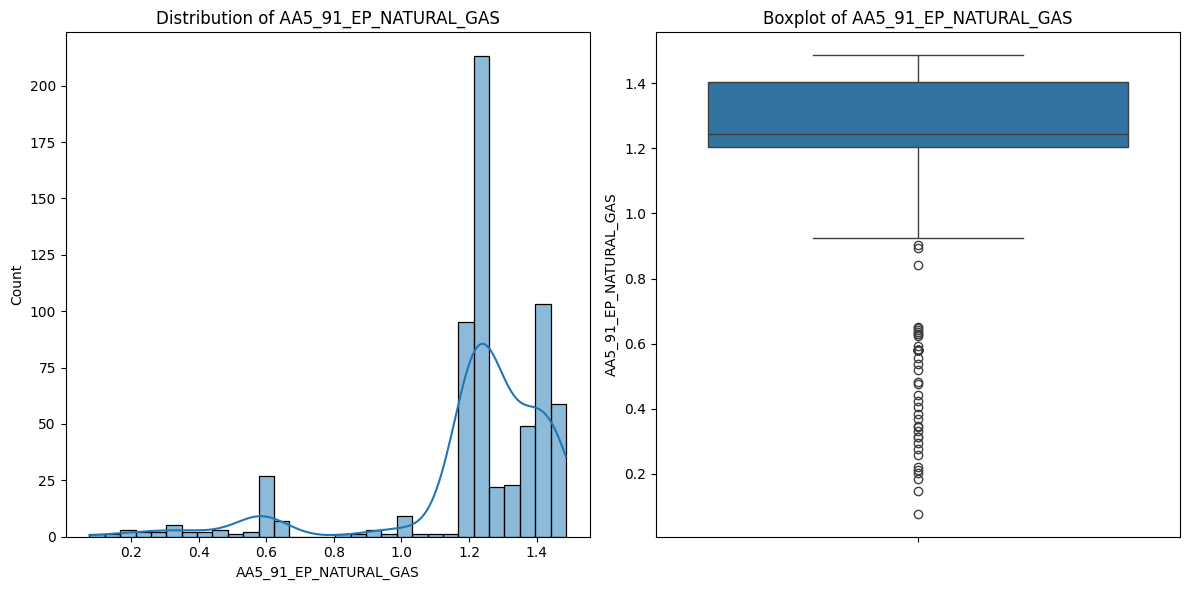


--- Summary Statistics for AA5_ANPR ---
count    640.000000
mean     237.353687
std       11.268865
min      171.140000
25%      231.552500
50%      236.070000
75%      240.580000
max      271.050000
Name: AA5_ANPR, dtype: float64


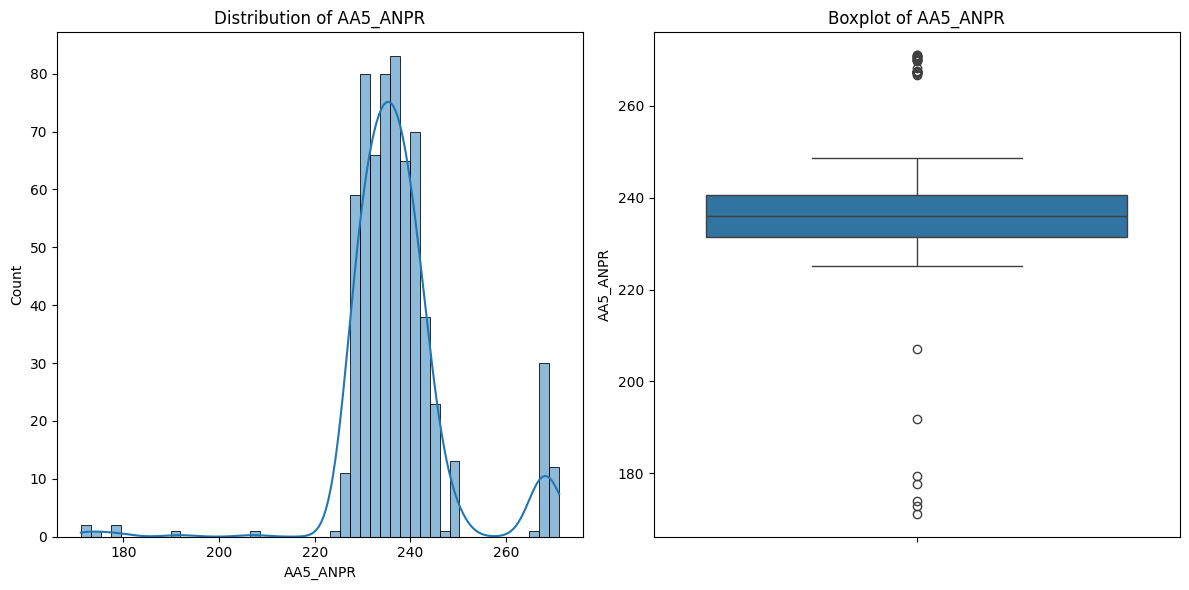


--- Summary Statistics for AA5_C_PR ---
count    640.000000
mean     149.760914
std        6.626417
min      136.810000
25%      146.397500
50%      147.635000
75%      149.700000
max      176.090000
Name: AA5_C_PR, dtype: float64


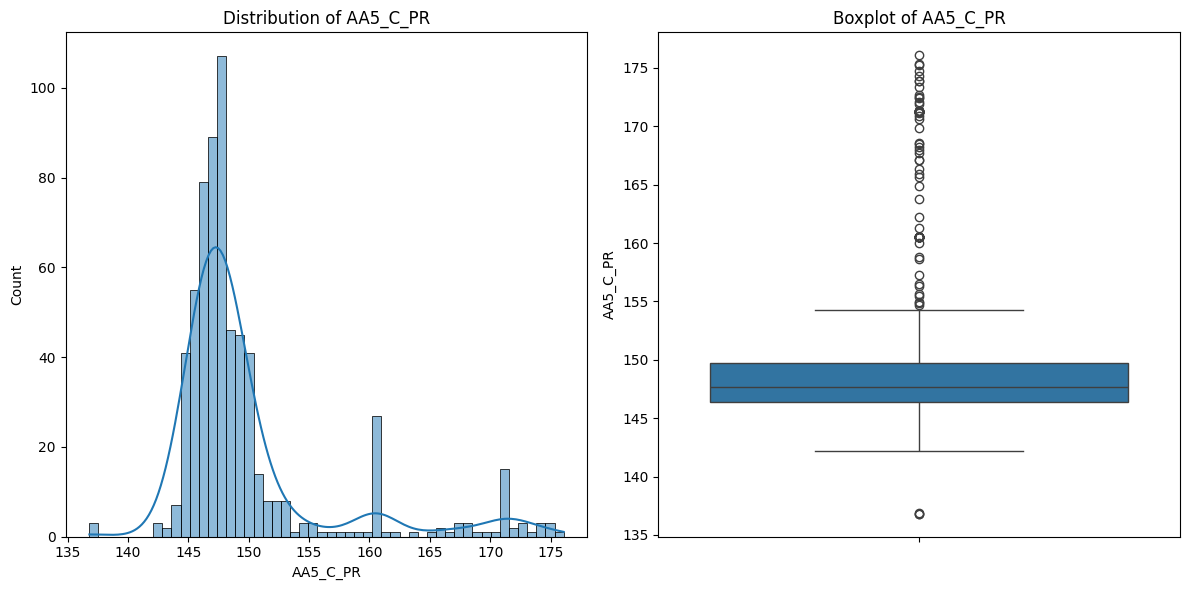


--- Summary Statistics for AA5_FBHP ---
count    640.000000
mean     244.242656
std        5.872981
min      234.630000
25%      239.210000
50%      243.895000
75%      248.537500
max      255.620000
Name: AA5_FBHP, dtype: float64


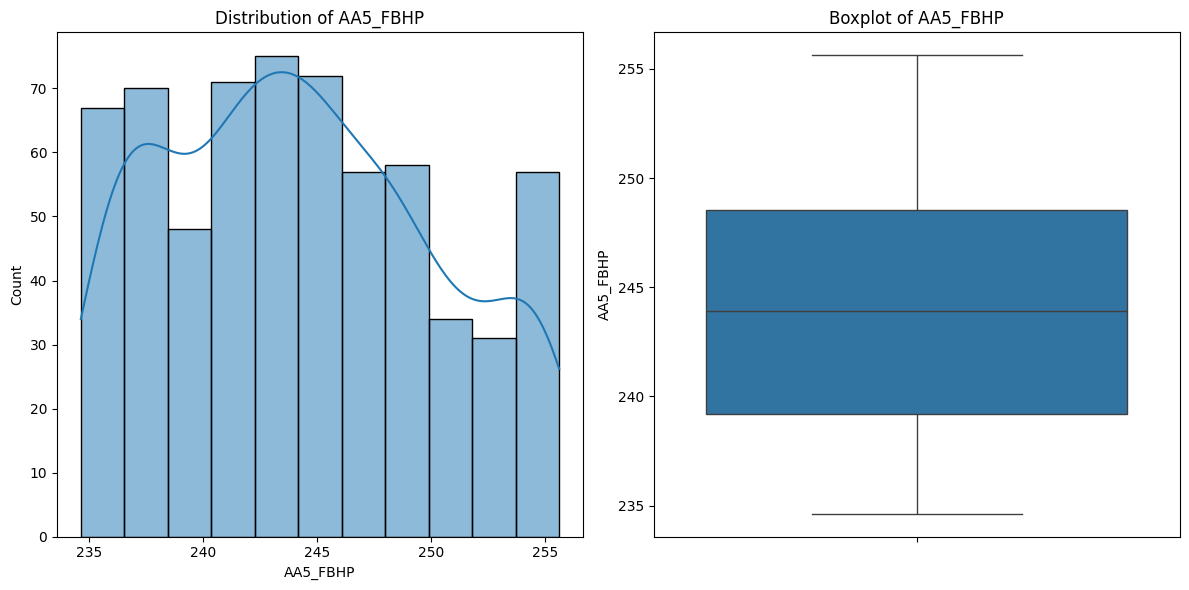


--- Summary Statistics for AA5_ANTP ---
count    640.000000
mean       5.824688
std        0.631775
min        3.000000
25%        5.700000
50%        5.900000
75%        6.200000
max        7.700000
Name: AA5_ANTP, dtype: float64


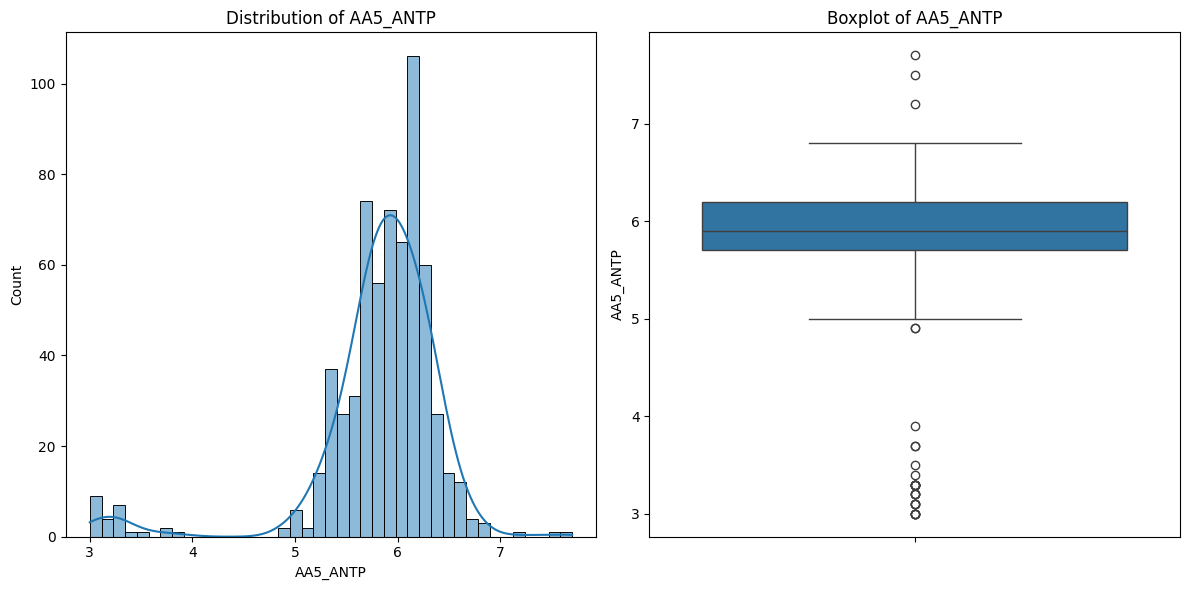


--- Summary Statistics for AA5_C_TE ---
count    640.000000
mean      11.346641
std        1.861747
min        2.700000
25%       11.000000
50%       11.300000
75%       12.200000
max       15.800000
Name: AA5_C_TE, dtype: float64


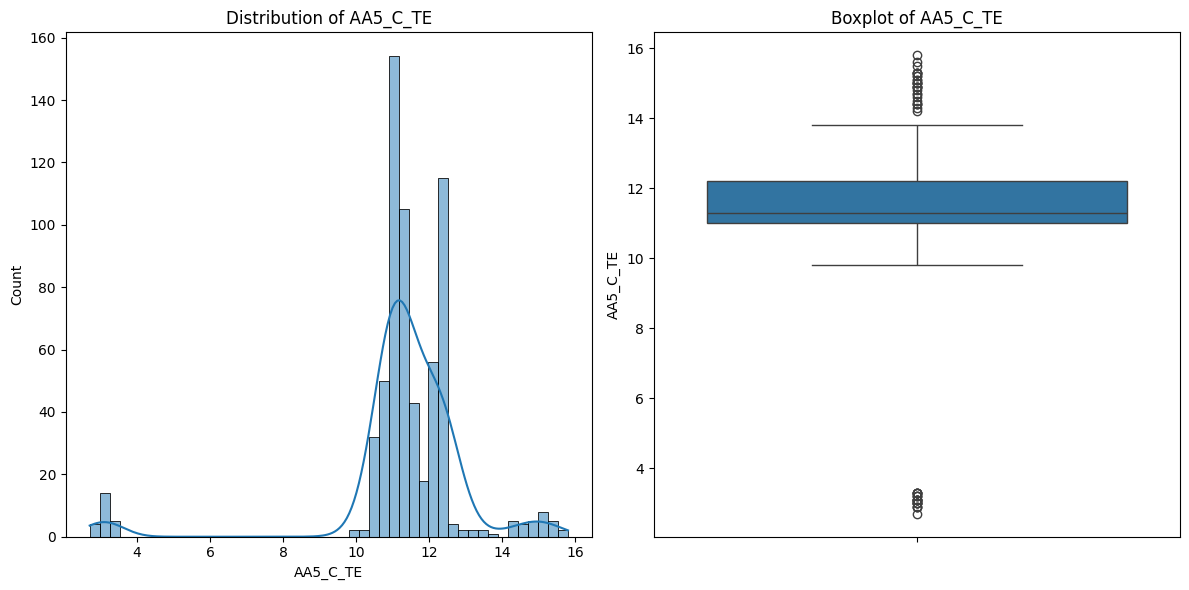


--- Summary Statistics for AA5_FBHT ---
count    640.000000
mean      28.884531
std        1.014339
min       21.600000
25%       29.000000
50%       29.100000
75%       29.100000
max       29.200000
Name: AA5_FBHT, dtype: float64


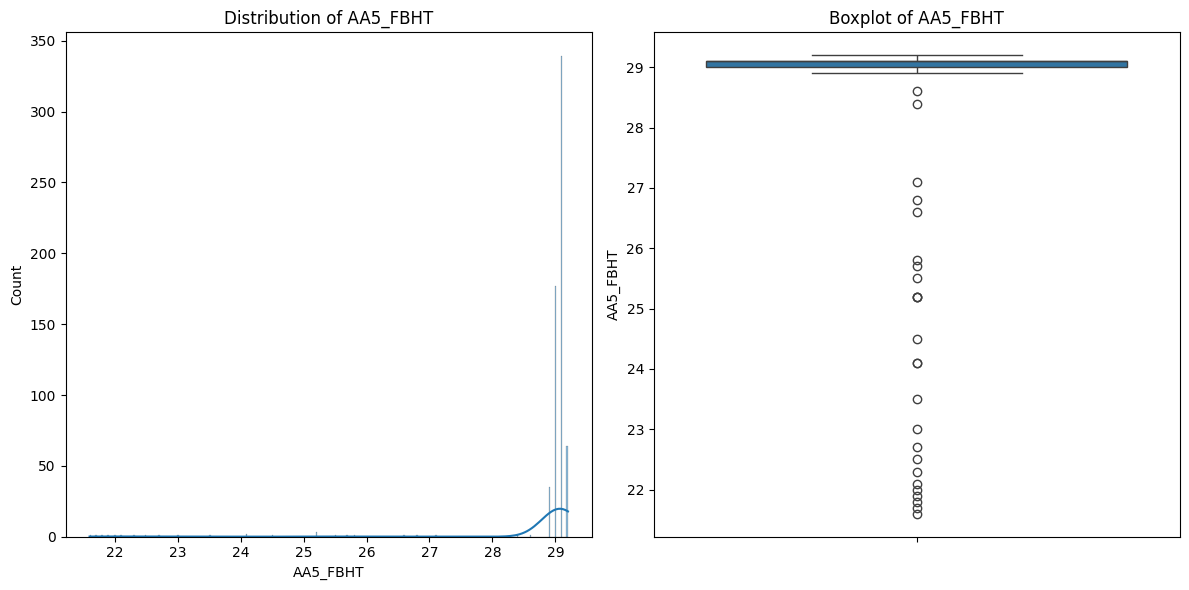


--- Summary Statistics for AA5_C_OP ---
count    640.000000
mean      30.583797
std        2.993461
min       17.310000
25%       28.850000
50%       29.810000
75%       33.650000
max       34.620000
Name: AA5_C_OP, dtype: float64


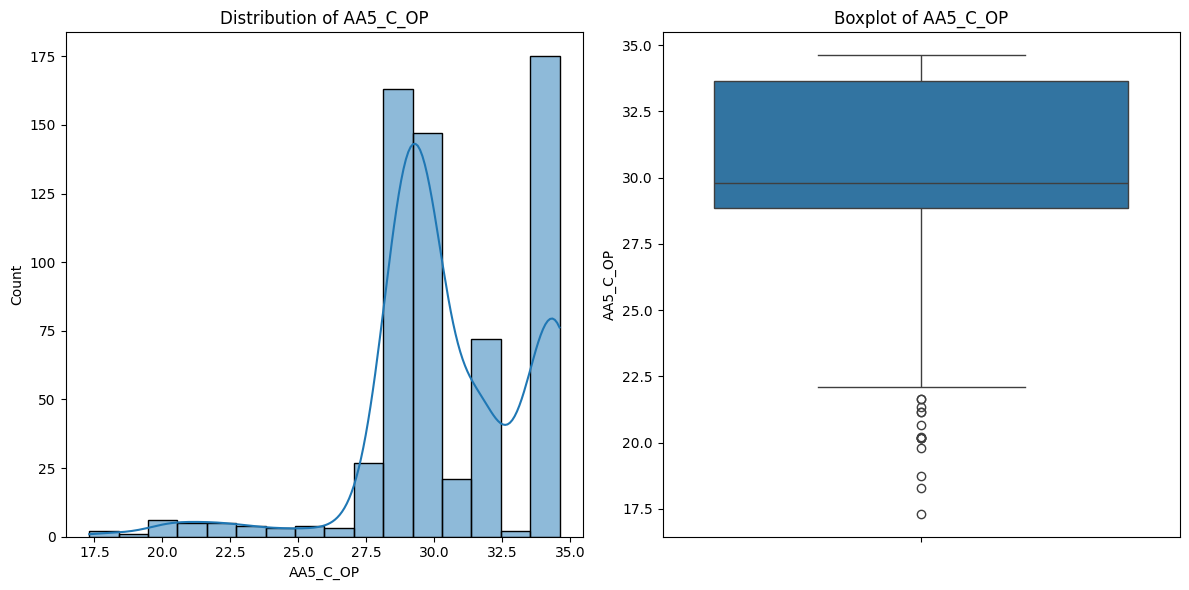

In [12]:
# Key variables for each well
key_variables = ['91_9500062414', '91_EP_NATURAL_GAS', 'ANPR', 'C_PR', 'FBHP', 'ANTP', 'C_TE', 'FBHT', 'C_OP']

# Iterate through each well
for well in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
    print(f"\n--- Summary Statistics for {well} ---")
    for var in key_variables:
        column_name = f'{well}_{var}'
        print(f"\n--- Summary Statistics for {column_name} ---")
        print(df[column_name].describe())
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column_name])
        plt.title(f'Boxplot of {column_name}')
        plt.tight_layout()
        plt.show()

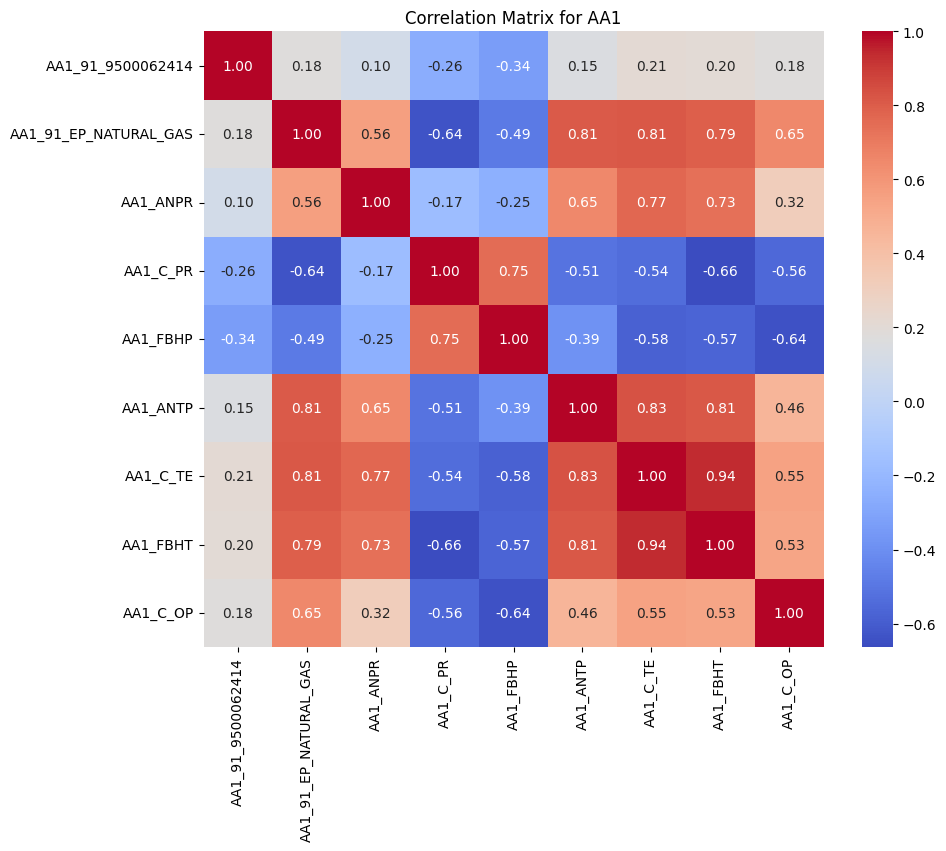

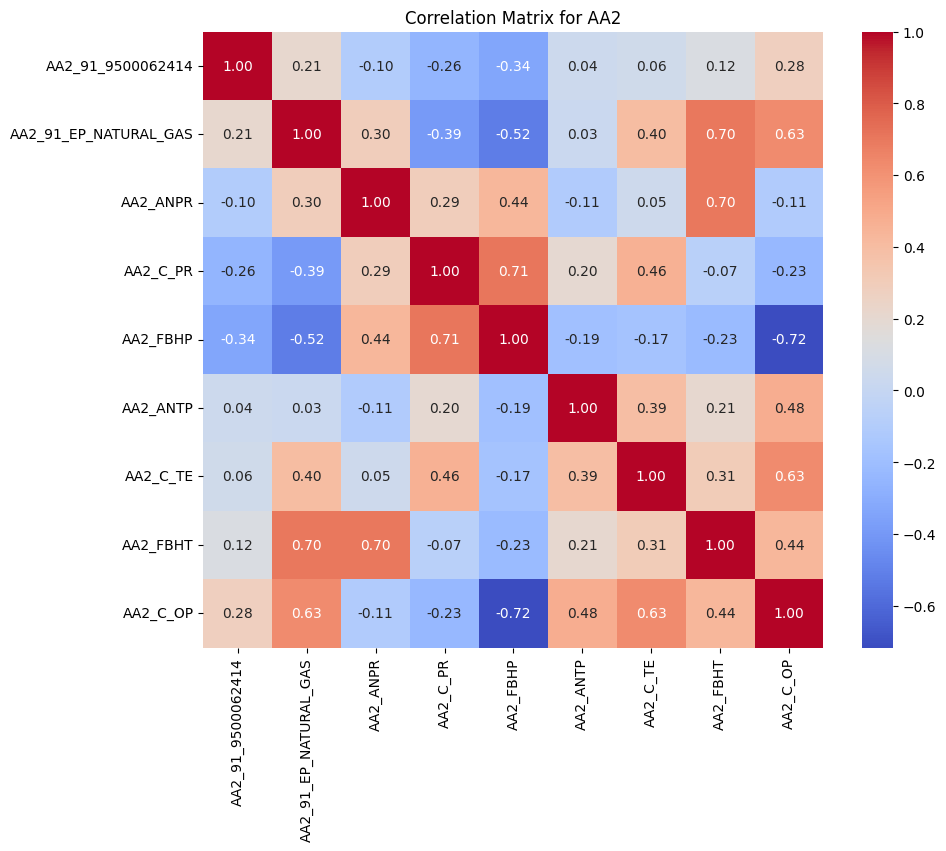

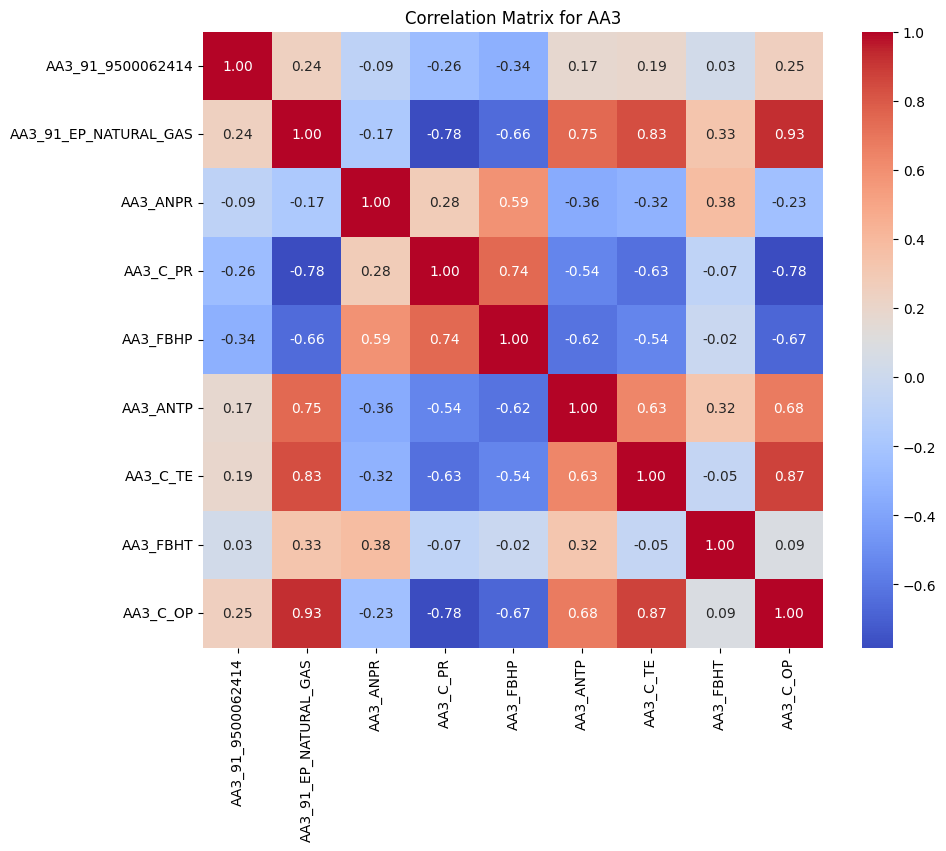

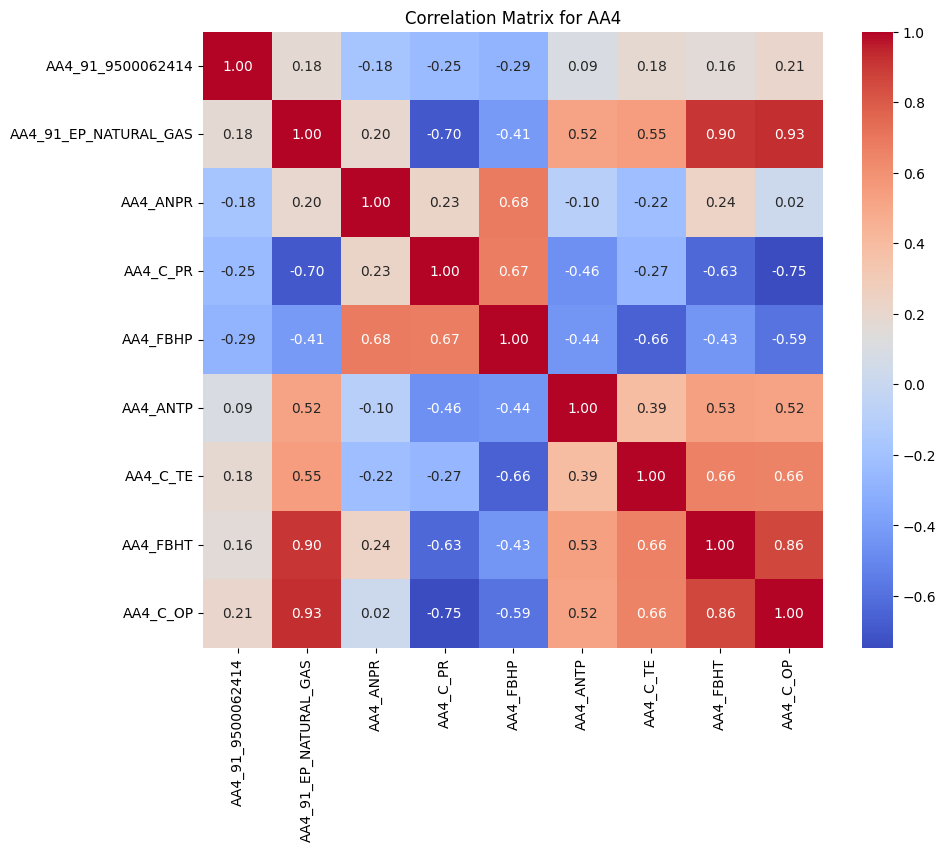

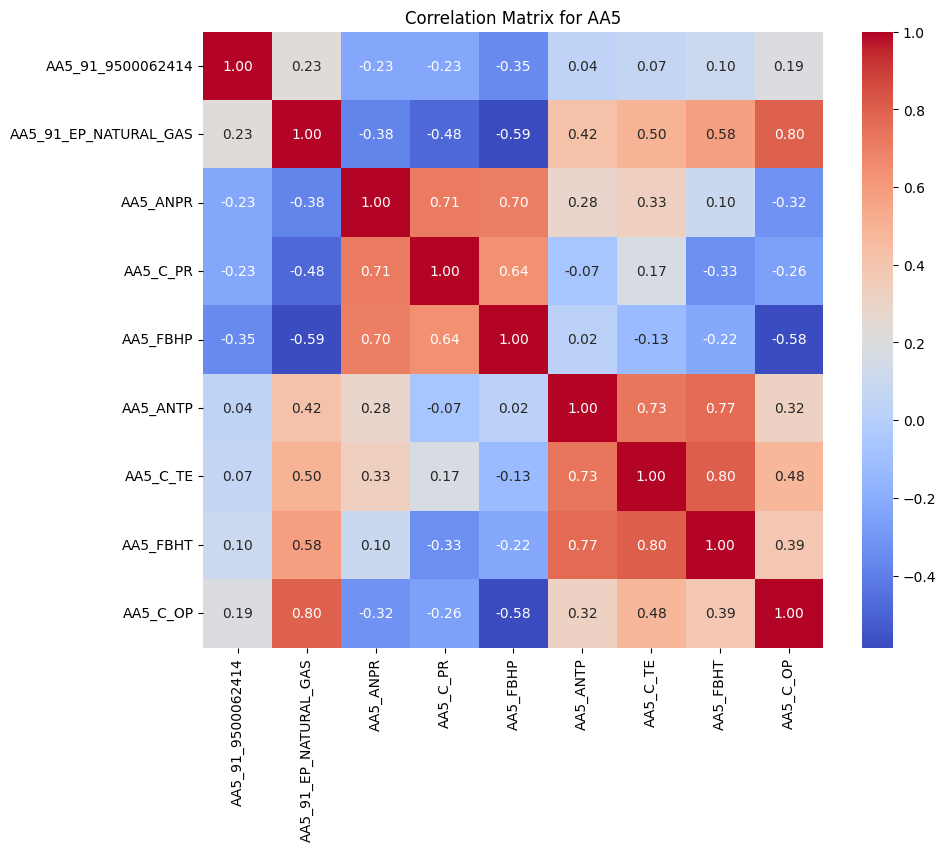

In [13]:
# Iterate through each well
for well in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
    well_data = df[[f'{well}_{var}' for var in key_variables]]
    correlation_matrix = well_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {well}')
    plt.savefig(f'{well}_heatmap.png') # Save the heatmap
    plt.show()

# Making a model

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR

# Function to create and evaluate models for each well
def evaluate_models(X, y, well_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'SVR': SVR(kernel='rbf')
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Cross validation score
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

        results[name] = {
            'RMSE': rmse,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'model': model,
            'scaler': scaler
        }

    print(f"\nResults for {well_name}:")
    for name, metrics in results.items():
        print(f"\n{name}:")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        print(f"R2 Score: {metrics['R2']:.4f}")
        print(f"Cross-val R2: {metrics['CV_R2_mean']:.4f} (+/- {metrics['CV_R2_std']*2:.4f})")

    return results

# Prepare data for each well
wells = {
    'AA1': {
        'features': ['AA1_91_9500062414', 'AA1_ANPR', 'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR',
                    'AA1_C_TE', 'AA1_FBHP', 'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT'],
        'target': 'AA1_91_EP_NATURAL_GAS'
    },
    'AA2': {
        'features': ['AA2_91_9500062414', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP', 'AA2_C_PR',
                    'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP', 'AA2_FTHT'],
        'target': 'AA2_91_EP_NATURAL_GAS'
    },
    'AA3': {
        'features': ['AA3_91_9500062414', 'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR',
                    'AA3_C_TE', 'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT'],
        'target': 'AA3_91_EP_NATURAL_GAS'
    },
    'AA4': {
        'features': ['AA4_91_9500062414', 'AA4_ANPR', 'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR',
                    'AA4_C_TE', 'AA4_FBHP', 'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT'],
        'target': 'AA4_91_EP_NATURAL_GAS'
    },
    'AA5': {
        'features': ['AA5_91_9500062414', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP', 'AA5_C_PR',
                    'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP', 'AA5_FTHT'],
        'target': 'AA5_91_EP_NATURAL_GAS'
    }
}

# Train and evaluate models for each well
all_results = {}
for well_name, well_data in wells.items():
    X = df[well_data['features']]
    y = df[well_data['target']]
    all_results[well_name] = evaluate_models(X, y, well_name)


Results for AA1:

Linear Regression:
RMSE: 0.0353
R2 Score: 0.9080
Cross-val R2: 0.7995 (+/- 0.1967)

Random Forest:
RMSE: 0.0085
R2 Score: 0.9947
Cross-val R2: 0.9185 (+/- 0.0974)

XGBoost:
RMSE: 0.0133
R2 Score: 0.9869
Cross-val R2: 0.9250 (+/- 0.1203)

Gradient Boosting:
RMSE: 0.0140
R2 Score: 0.9854
Cross-val R2: 0.9232 (+/- 0.0968)

SVR:
RMSE: 0.0691
R2 Score: 0.6467
Cross-val R2: 0.6178 (+/- 0.1132)

Results for AA2:

Linear Regression:
RMSE: 0.0784
R2 Score: 0.8745
Cross-val R2: 0.8703 (+/- 0.1668)

Random Forest:
RMSE: 0.0408
R2 Score: 0.9660
Cross-val R2: 0.9478 (+/- 0.0682)

XGBoost:
RMSE: 0.0203
R2 Score: 0.9916
Cross-val R2: 0.9509 (+/- 0.0551)

Gradient Boosting:
RMSE: 0.0458
R2 Score: 0.9572
Cross-val R2: 0.9377 (+/- 0.0785)

SVR:
RMSE: 0.0702
R2 Score: 0.8996
Cross-val R2: 0.8568 (+/- 0.1319)

Results for AA3:

Linear Regression:
RMSE: 0.0652
R2 Score: 0.9787
Cross-val R2: 0.9394 (+/- 0.1163)

Random Forest:
RMSE: 0.0495
R2 Score: 0.9878
Cross-val R2: 0.9515 (+/- 0.1399


Model terbaik untuk Sumur AA1: Random Forest


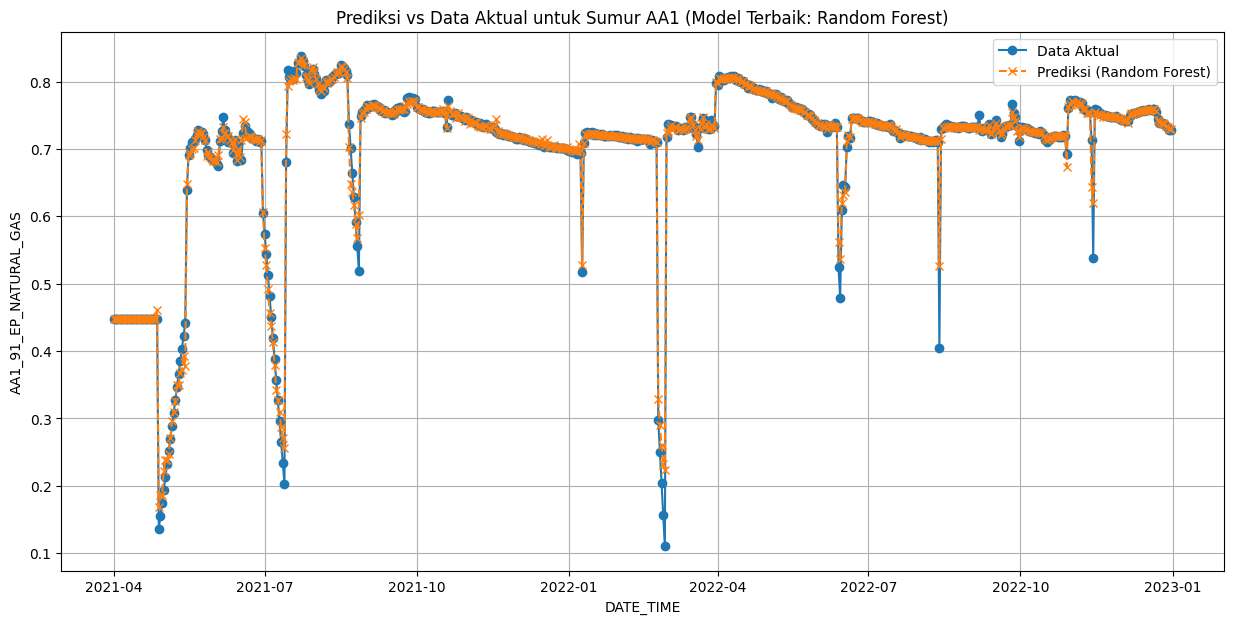


Model terbaik untuk Sumur AA2: XGBoost


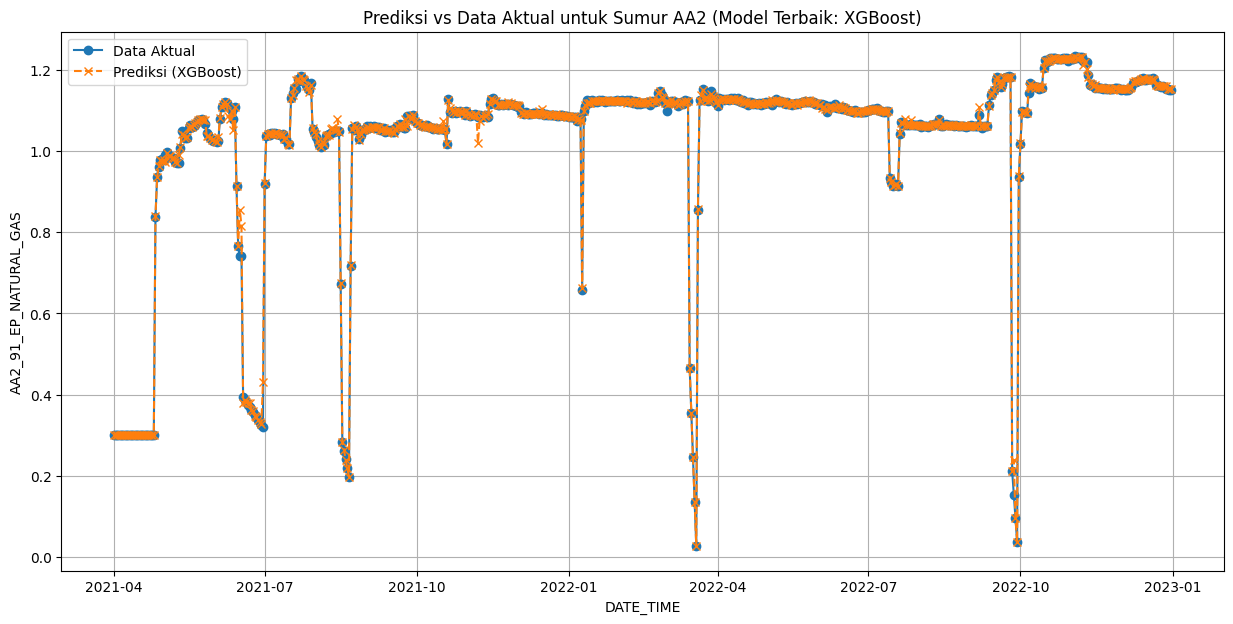


Model terbaik untuk Sumur AA3: Gradient Boosting


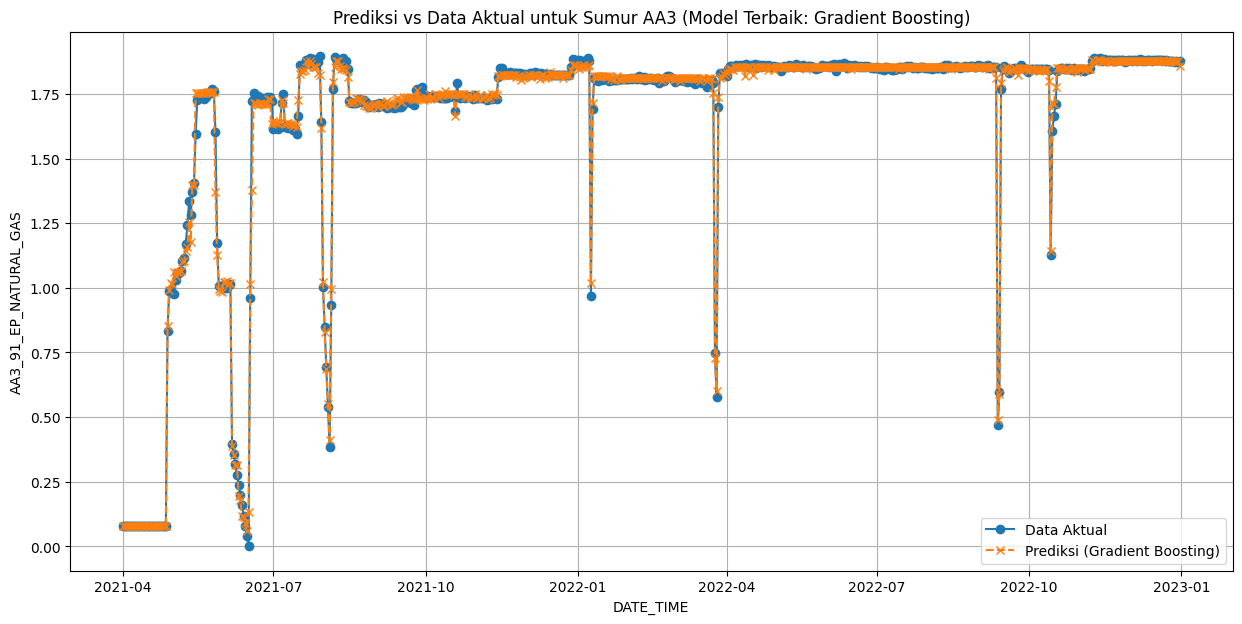


Model terbaik untuk Sumur AA4: Random Forest


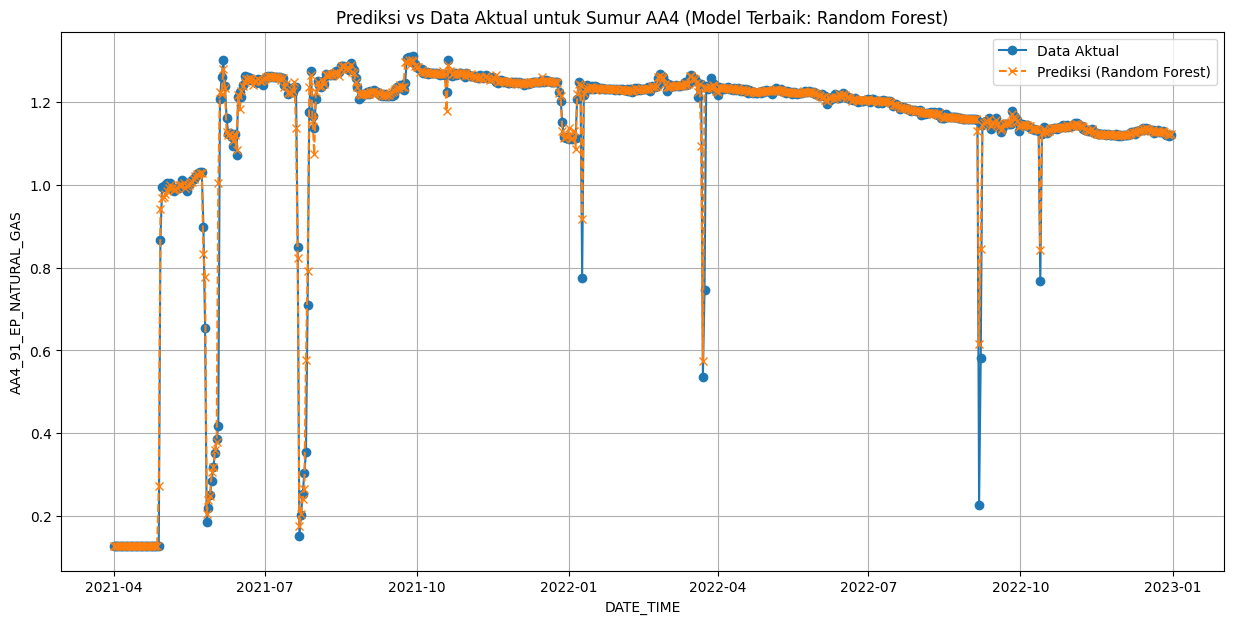


Model terbaik untuk Sumur AA5: SVR


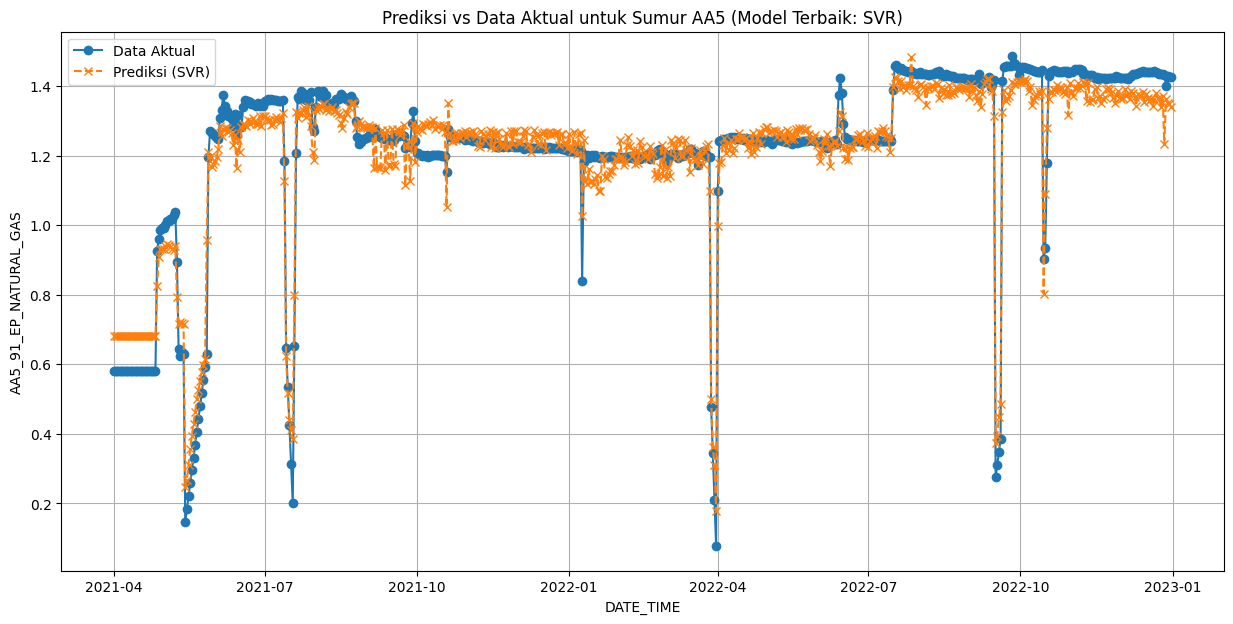

In [16]:
# prompt: Buatkan grafik yang dapat melihatkan grafik prediksi dan data aktual dengan hasil RMSE paling kecil dan r^2 paling besar

# Function to find the best model based on RMSE and R2
def find_best_model(results):
    best_model_name = None
    best_rmse = float('inf')
    best_r2 = -float('inf')

    for name, metrics in results.items():
        if metrics['RMSE'] < best_rmse and metrics['R2'] > best_r2:
            best_rmse = metrics['RMSE']
            best_r2 = metrics['R2']
            best_model_name = name
        elif metrics['RMSE'] == best_rmse and metrics['R2'] > best_r2:
            best_r2 = metrics['R2']
            best_model_name = name
        elif metrics['RMSE'] < best_rmse and metrics['R2'] == best_r2:
             best_rmse = metrics['RMSE']
             best_model_name = name


    return best_model_name

# Function to plot actual vs predicted values for the best model
def plot_best_model_prediction(df, well_name, best_model_name, model_info):
    X = df[wells[well_name]['features']]
    y = df[wells[well_name]['target']]

    # Use the trained model and scaler from the results
    best_model = model_info['model']
    scaler = model_info['scaler']

    # Scale the features
    X_scaled = scaler.transform(X)

    # Get predictions on the entire dataset (for plotting)
    y_pred = best_model.predict(X_scaled)

    plt.figure(figsize=(15, 7))
    plt.plot(df['DATE_TIME'], y, label='Data Aktual', marker='o', linestyle='-')
    plt.plot(df['DATE_TIME'], y_pred, label=f'Prediksi ({best_model_name})', marker='x', linestyle='--')
    plt.title(f'Prediksi vs Data Aktual untuk Sumur {well_name} (Model Terbaik: {best_model_name})')
    plt.xlabel('DATE_TIME')
    plt.ylabel(f'{well_name}_91_EP_NATURAL_GAS')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate through each well, find the best model, and plot the results
for well_name, results in all_results.items():
    best_model_name = find_best_model(results)
    print(f"\nModel terbaik untuk Sumur {well_name}: {best_model_name}")

    # Get the model and scaler info for the best model
    best_model_info = results[best_model_name]

    # Plot the actual vs predicted for the best model
    plot_best_model_prediction(df, well_name, best_model_name, best_model_info)


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Create future dates for prediction
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
print("Generating predictions for period:", start_date.strftime('%Y-%m-%d'), "to", end_date.strftime('%Y-%m-%d'))

# Dictionary to store predictions for each well
predictions_dict = {}

# Train XGBoost model and make predictions for each well
for well_prefix in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
    print(f"\nTraining XGBoost model for {well_prefix}")

    # Select features and target for current well
    features = [f"{well_prefix}_91_9500062414", f"{well_prefix}_ANPR", f"{well_prefix}_ANTP",
                f"{well_prefix}_C_OP", f"{well_prefix}_C_PR", f"{well_prefix}_C_TE",
                f"{well_prefix}_FBHP", f"{well_prefix}_FBHT", f"{well_prefix}_FTHP",
                f"{well_prefix}_FTHT"]
    target = f"{well_prefix}_91_EP_NATURAL_GAS"

    X = df[features]
    y = df[target]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train XGBoost model on all data
    model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # Generate synthetic future features based on historical patterns
    # Using mean values from last 30 days as a baseline
    last_30_days = X.tail(30).mean()

    # Create future features matrix
    n_days = len(future_dates)
    future_features = np.tile(last_30_days.values, (n_days, 1))

    # Add some random variation to make it more realistic
    np.random.seed(42)
    variation = np.random.normal(0, 0.1, future_features.shape)
    future_features = future_features * (1 + variation)

    # Scale future features
    future_features_scaled = scaler.transform(future_features)

    # Make predictions
    predictions = model.predict(future_features_scaled)

    # Store predictions
    predictions_dict[well_prefix] = predictions

# Create DataFrame with predictions
forecast_df = pd.DataFrame(index=future_dates)
for well_prefix in predictions_dict.keys():
    forecast_df[f"{well_prefix}_91_EP_NATURAL_GAS"] = predictions_dict[well_prefix]

# Save forecasts to CSV
forecast_df.to_csv('gas_production_forecast_2023.csv')
print("\nForecast summary:")
print(forecast_df.describe())

# Display first few rows of predictions
print("\nFirst few days of predictions:")
print(forecast_df.head())

Generating predictions for period: 2023-01-01 to 2023-12-31

Training XGBoost model for AA1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Training XGBoost model for AA2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Training XGBoost model for AA3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Training XGBoost model for AA4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Training XGBoost model for AA5

Forecast summary:
       AA1_91_EP_NATURAL_GAS  AA2_91_EP_NATURAL_GAS  AA3_91_EP_NATURAL_GAS  \
count             365.000000             365.000000             365.000000   
mean                0.675792               0.834986               1.583789   
std                 0.096824               0.276117               0.216297   
min                 0.417927               0.308431               1.103402   
25%                 0.605075               0.583980               1.367931   
50%                 0.689793               0.723768               1.640676   
75%                 0.751941               1.139940               1.782022   
max                 0.825347               1.220867               1.879238   

       AA4_91_EP_NATURAL_GAS  AA5_91_EP_NATURAL_GAS  
count             365.000000             365.000000  
mean                0.788530               1.204788  
std                 0.263482               0.225138  
min                 0.438106  

In [20]:
df_predcited = pd.read_csv('gas_production_forecast_2023.csv')
df_predcited.head()

,Unnamed: 0,AA1_91_EP_NATURAL_GAS,AA2_91_EP_NATURAL_GAS,AA3_91_EP_NATURAL_GAS,AA4_91_EP_NATURAL_GAS,AA5_91_EP_NATURAL_GAS
0,2023-01-01,0.689748,1.154929,1.829255,1.198295,1.420421
1,2023-01-02,0.701271,0.898185,1.367598,0.957504,1.172460
2,2023-01-03,0.632544,1.125019,1.339913,0.791590,1.193423
3,2023-01-04,0.751028,0.559983,1.643971,0.563910,1.248140
4,2023-01-05,0.773955,0.899087,1.360142,1.072500,1.150960
